# LAB 8

## Expt 1(a)

### Starting a new Python module called keyfun.py and using my pam12 function from the pamfun module as a building block to complete the ASK transmitter function askxmtr.

### Testing my transmitter by generating a short (about 10 symbol times) random coherent OOK signal and a short random noncoherent OOK signal and displaying them in the time domain. With Fs = 44100 Hz, FB = 100 baud, fc = 300 Hz, and a rectangular pulse p(t) of width TB = 1/FB. 

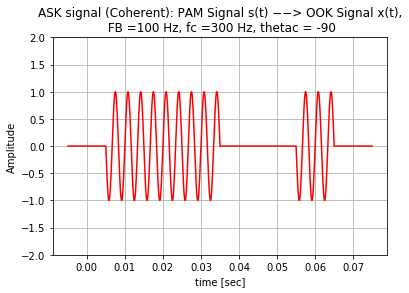

In [2]:
run Q1A

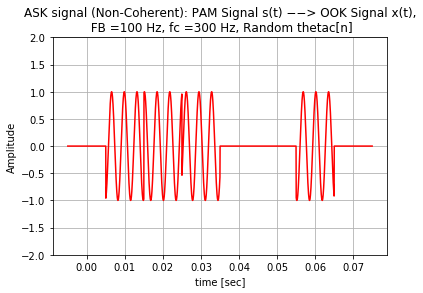

In [2]:
run Q1A

### It is clear from the above graphs that the transmitted phase for a non-coherent signal is not constant. Where as for the coherent the phase does not vary.

## Expt 1(B)

### Completed ASK receiver function, called askrcvr. The goal is to be able to use it to receive coherent and noncoherent ASK signals, and to make scatter plots.


### First We test the coherent receiver. 

In [2]:
# For testing coherent demodulator
import keyfun
import comsig
from pylab import *

an = array([0, 1, 1, 1, 0, 0, 1, 0])     # taking the same data seq as taken in Lab Manual Page(4)
Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
fcparms=[300,-pi/2]

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)

bn, bt,wt,ixn= keyfun.askrcvr(sig_xt,xtype,fcparms,[100,0],ptype,pparms)

print(bn)

-220
-220
3528
[0 1 1 1 0 0 1 0]


#### As observed from above, the output is the same as the input. Thus my reveiver is working perfectly. 

## Next We test if the non coherent receiver is working as well

In [2]:
# For testing non-coherent demodulator
import keyfun
import comsig
from pylab import *

an = array(np.floor(randn(200)%2)%2, int8)
print(an)
thetacn = 2*pi*rand(len(an))

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='noncoh'
fcparms=[300,thetacn]

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)

bn, bt,wt,ixn= keyfun.askrcvr(sig_xt,Fs, xtype,fcparms,[100,0],ptype,pparms)

print(bn)


[0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0]
-220
-220
88200
-220
-220
88200
[0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0]


### From above we observe that the non coherent receiver is working as well

## Expt 1(c)

### In this experiment we use random binary data to produce (i) a coherent OOK signal, (ii) a noncoherent OOK signal, and (iii) a BPSK signal, each of duration 2 sec. With parameters given as follows:
### Fs = 44100 Hz, FB = 100 baud, fc = 2100 Hz, and let p(t) be a rectangular pulse of width TB. 

### We plot the PSD and the scatter plot of the three signals as well as the PSD square of the three signal. Next we compare the plots of all three.

### (i) Coherent OOK signl

### First We plot the PSD of the signal 

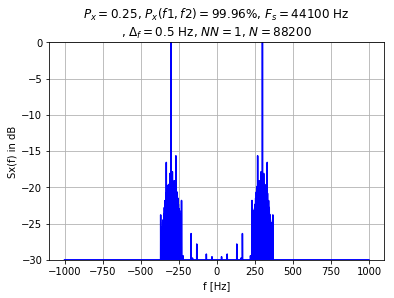

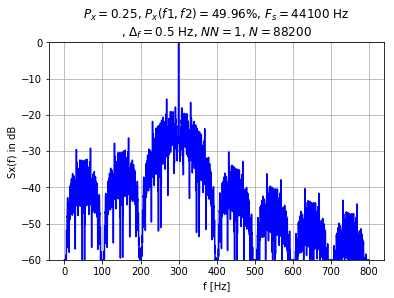

In [4]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
fcparms=[300,-pi/2]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-1000,1000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [0,800,-60],sig_xt.Nsamp)

### Plotting the PSD for a triangular PAM pulse

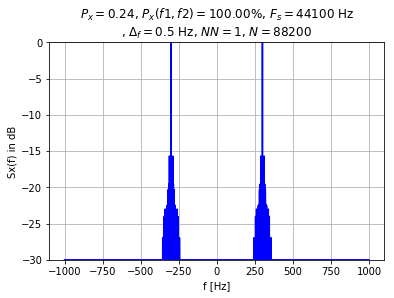

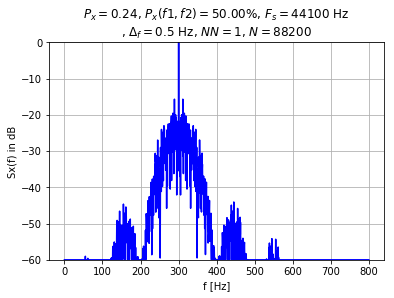

In [5]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='tri'
pparms=[]
xtype='coh'
fcparms=[300,-pi/2]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-1000,1000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [0,800,-60],sig_xt.Nsamp)

### Next we plot the square of the signal

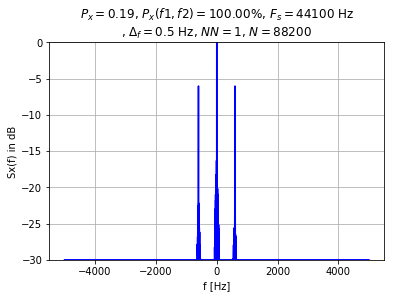

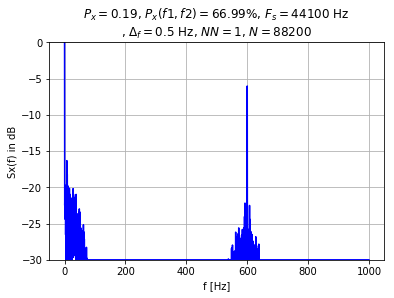

In [4]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
fcparms=[300,-pi/2]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-5000,5000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [0,1000,-30],sig_xt.Nsamp)

### Next we plot the scatter plot

-220
-220
88200


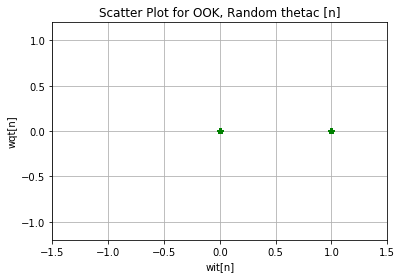

In [2]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1
import matplotlib.pyplot as plt

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
fcparms=[300,0]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
bn,bt,wt,ixn= keyfun.askrcvr(sig_xt,Fs,xtype,fcparms,[100,0],ptype,pparms)

plt.plot(wt[ixn].real, wt.imag[ixn], 'g*')
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
plt.xlim([-1.5,1.5])
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()


### (ii) For non-coherent signals 

### Plotting the PSD of the signal

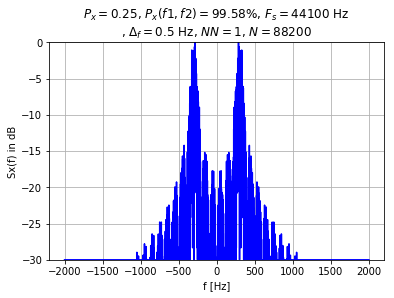

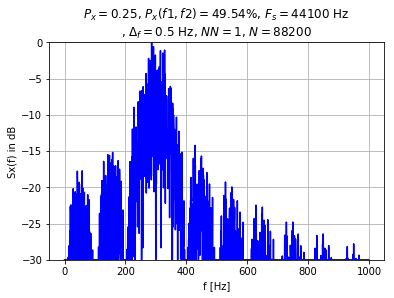

In [2]:
# For producing a non-coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb= 100
Fs= 44100
ptype='rect'
pparms=[]
xtype='noncoh'

tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
thetacn = 2*pi*rand(len(an))
fcparms=[300,thetacn]

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-2000,2000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [0,1000,-30],sig_xt.Nsamp)

### Plotting the PSD of a non-coherent signal with a triangular pulse

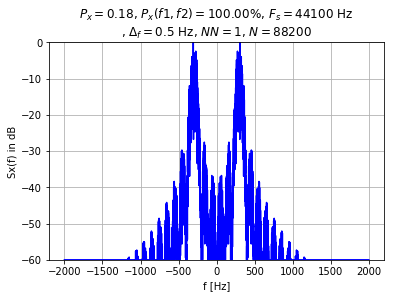

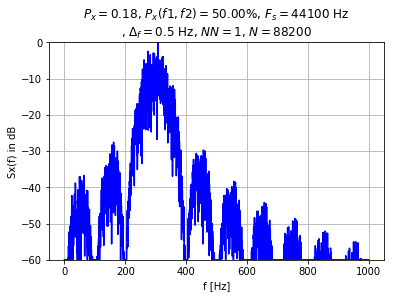

In [7]:
# For producing a non-coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb= 100
Fs= 44100
ptype='tri'
pparms=[]
xtype='noncoh'

tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
thetacn = 2*pi*rand(len(an))
fcparms=[300,thetacn]

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-2000,2000,-60],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [0,1000,-60],sig_xt.Nsamp)

### Next we plot the square of the signal

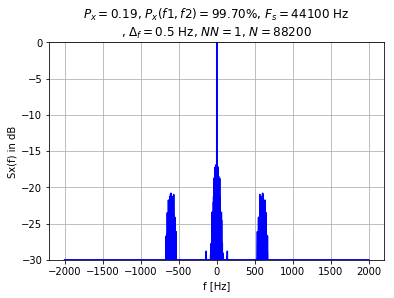

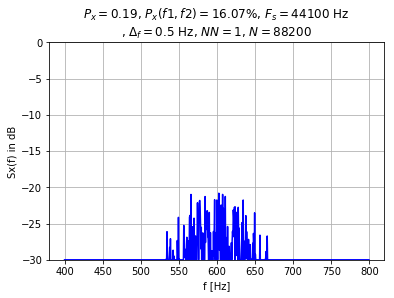

In [2]:
# For producing a non-coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='noncoh'

tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
thetacn = 2*pi*rand(len(an))
fcparms=[300,thetacn]

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-2000,2000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [400,800,-30],sig_xt.Nsamp)

### Next we plot the scatter plot

-220
-220
88200
-220
-220
88200


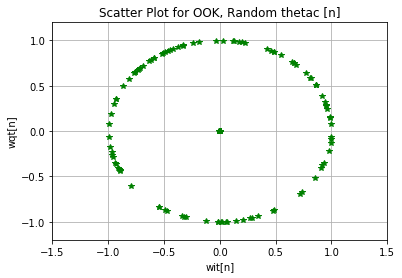

In [3]:
# For producing a non-coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1
import matplotlib.pyplot as plt

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='noncoh'

tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
thetacn = 2*pi*rand(len(an))
fcparms=[300,thetacn]

sig_an = comsig.sigSequ(an,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
bn,bt,wt,ixn= keyfun.askrcvr(sig_xt,Fs,xtype,fcparms,[100,0],ptype,pparms)

plt.plot(wt[ixn].real, wt.imag[ixn], 'g*')
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
plt.xlim([-1.5,1.5])
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()


### (iii) BPSK Signal

### Plotting the PSD of the signal

## Expt 1(d)

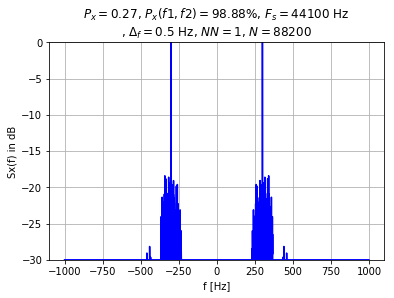

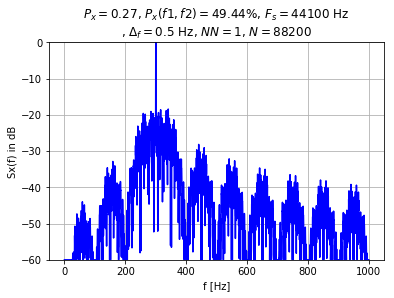

In [9]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
fcparms=[300,0]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
dn = (2*an) - 1

sig_an = comsig.sigSequ(dn,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-1000,1000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [0,1000,-60],sig_xt.Nsamp)

### Plotting the PSD of the bpsk with a triangular pulse

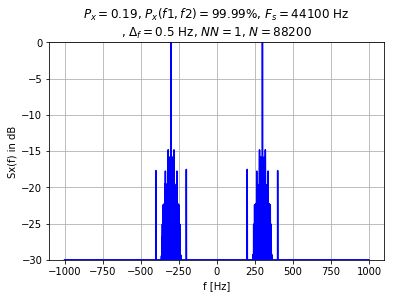

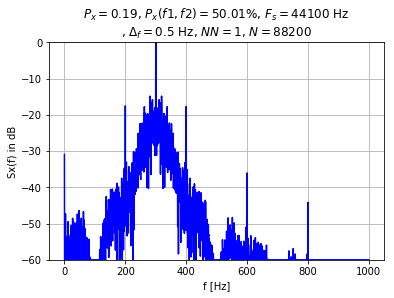

In [10]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='tri'
pparms=[]
xtype='coh'
fcparms=[300,0]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
dn = (2*an) - 1

sig_an = comsig.sigSequ(dn,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-1000,1000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [0,1000,-60],sig_xt.Nsamp)

### Next We plot the PSD of the square of the signal

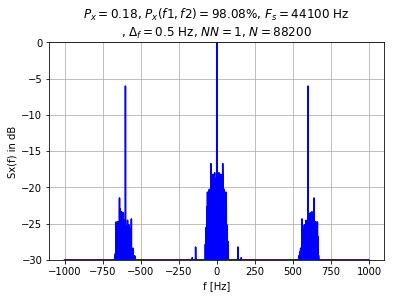

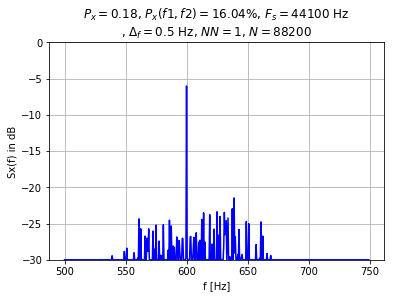

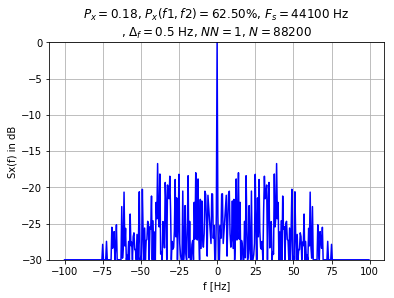

In [5]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
fcparms=[300,0]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
dn = (2*an) - 1

sig_an = comsig.sigSequ(dn,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
showfun1.showpsd(sig_xt, Fs, [-1000,1000,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [500,750,-30],sig_xt.Nsamp)
showfun1.showpsd(sig_xt, Fs, [-100,100,-30],sig_xt.Nsamp)

### Next we plot the scatter plot

-220
-220
88200


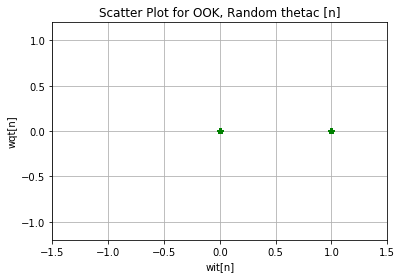

In [3]:
# For producing a coherent OOK signal
import keyfun
import comsig
from pylab import *
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
fcparms=[300,0]
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
an = floor(2*(rand(nbits)))
dn = (2*an) - 1

sig_an = comsig.sigSequ(dn,Fb)
tt,sig_xt,sig_st = keyfun.askxmtr(sig_an,Fb,Fs,ptype,pparms,xtype,fcparms)
bn,bt,wt,ixn= keyfun.askrcvr(sig_xt,Fs,xtype,fcparms,[100,0],ptype,pparms)

plt.plot(wt[ixn].real, wt.imag[ixn], 'g*')
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
plt.xlim([-1.5,1.5])
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()


### Observations from the plots and comparison between the three signals

#### We observe from the scatter plot that coherent ASK uses a two dimensional signal space. Where as the non coherent useds a two dimesnional signal space. The signal points for non-coherent are actually points in concentric circles. 

#### From the PSD of the signals we observe that the plots for the coherent OOk and BPSK are quite similar. They have a large DC component at Fc. This distinct Characteristic is absent in the non-coherent signal 

#### From the PSD of the square of the signal we observe that there is a spectral line at twice the Fc for all three types of signal

#### When we use a triangular pulse instead of a rectangular pulse the difference is in the shape of the pulse. As expected with a triangular pulse the lobes go down faster. The pulse width doubles to 2Tb as well

## Expt 1(d)

### To recover the fc of the signals I look at the PSDs of the received signal. The PSD also tells me the pulse used in the Pulse Amplitude modulation of the signal and whether the Amplitude shift keying is non/coherent 

## For asksig801. 

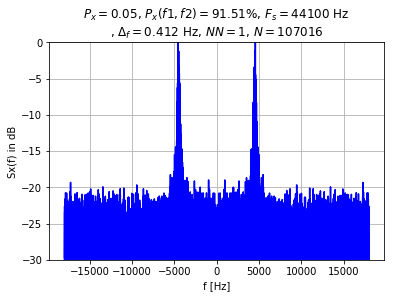

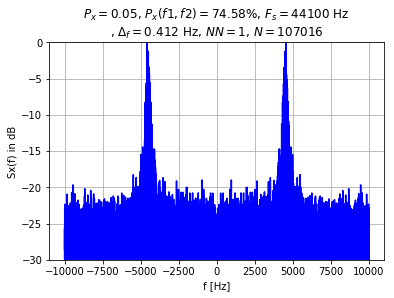

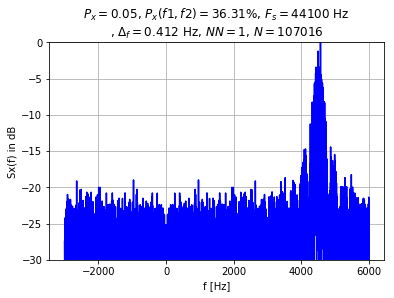

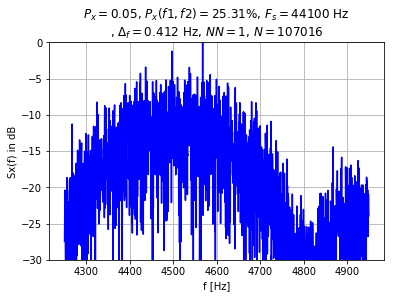

In [15]:
import wavfun
import showfun1
import comsig
import keyfun

Fs, rt = wavfun.wavread('asksig801.wav')


sig_rt = comsig.sigWave(rt, Fs)
showfun1.showpsd(sig_rt, Fs, [-18000,18000,-30],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [-10000,10000,-30],sig_rt.__len__())
#showfun1.showpsd(sig_rt, Fs, [8000,10000,-30],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [-3000,6000,-30],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [4250,4950,-30],sig_rt.__len__())


#### The observed fc from the PSD is 4500. From the PSD it looks like a non-coherent signal as there is no DC component. The baud rate is approximately 300

-73
107016
-73
107016
2


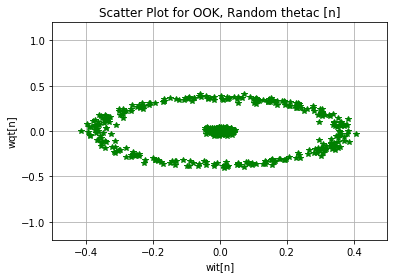

[73, 102, 32, 116, 104, 101, 32, 83, 101, 99, 114, 101, 116, 32, 87, 101, 114, 118, 105, 99, 101, 32, 102, 105, 110, 100, 115, 32, 115, 104, 114, 101, 100, 100, 101, 100, 32, 112, 97, 114, 101, 114, 32, 105, 110, 32, 121, 111, 117, 114, 32, 116, 114, 97, 115, 104, 44, 32, 116, 104, 101, 121, 32, 87, 73, 76, 76, 32, 112, 105, 101, 99, 101, 32, 105, 116, 32, 98, 97, 99, 107, 32, 116, 111, 103, 101, 116, 104, 101, 114, 33]
If the Secret Wervice finds shredded parer in your trash, they WILL piece it back together!


In [3]:
import wavfun
import showfun1
import comsig
import keyfun
import numpy as np
import pamfun
import ascfun
from pylab import *
import matplotlib.pyplot as plt

Fs, rt = wavfun.wavread('asksig801.wav')
Fb = 300
xtype = 'noncoh'
ptype = 'rect'
pparms = []
fcparms =[4500,0]
sig_rt = comsig.sigWave(rt, Fs)
tt = sig_rt.timeAxis()
FBparms = [300,0]

bn, bt, wt, ixn = keyfun.askrcvr(tt,sig_rt,Fs,xtype,fcparms,FBparms, ptype, pparms)

#showfun1.showeye(comsig.sigWave(bn,Fs), Fs, 300 , 50, [0.5, 3, -2, 2])
plt.plot(wt[ixn].real, wt.imag[ixn], 'g*')
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
plt.xlim([-0.5,0.5])
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()
textString, ASCIIString = ascfun.bin2asc(bn,8)
print(ASCIIString)

print(textString)


#### The scatter Plot confirm that it is indeed a non coherent signal. After changing the threshold for determining whether the transmitted value is a 0 or 1 to 0.06 I am getting the correct signal. To do this I plotted the Histogram of the bn values

-73
107016
-73
107016


(array([36756.,  9581.,  7037.,  7279.,  7561.,  7835.,  8461.,  9873.,
        10525.,  2108.]),
 array([1.95266382e-04, 4.20861757e-02, 8.39770851e-02, 1.25867994e-01,
        1.67758904e-01, 2.09649813e-01, 2.51540722e-01, 2.93431632e-01,
        3.35322541e-01, 3.77213451e-01, 4.19104360e-01]),
 <a list of 10 Patch objects>)

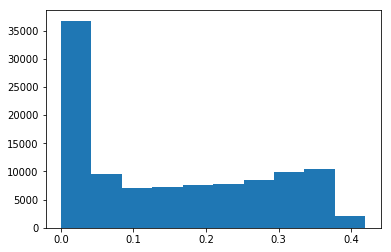

In [4]:
import wavfun
import showfun1
import comsig
import keyfun
import numpy as np
import pamfun
import ascfun
from pylab import *
import matplotlib.pyplot as plt

Fs, rt = wavfun.wavread('asksig801.wav')
Fb = 300
xtype = 'noncoh'
ptype = 'rect'
pparms = []
fcparms =[4500,0]
sig_rt = comsig.sigWave(rt, Fs)
tt = sig_rt.timeAxis()
FBparms = [300,0]

bn, bt, wt, ixn = keyfun.askrcvr(tt,sig_rt,Fs,xtype,fcparms,FBparms, ptype, pparms)
plt.hist(bt)

## For asksig802

### Analysis of asksig802

#### I follow the same steps as the last time and plot the PSDs to try to gauge what the Fc, Fb, rtype and ptype is. 

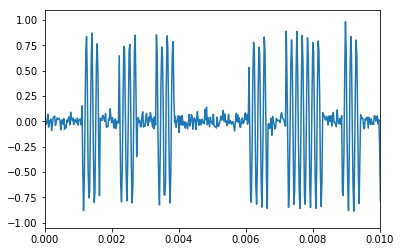

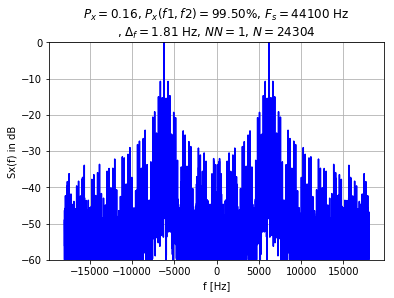

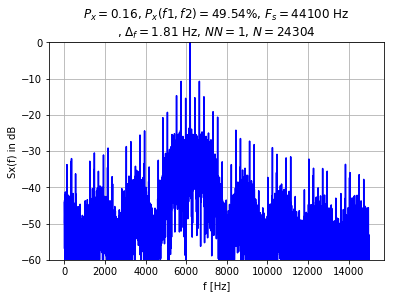

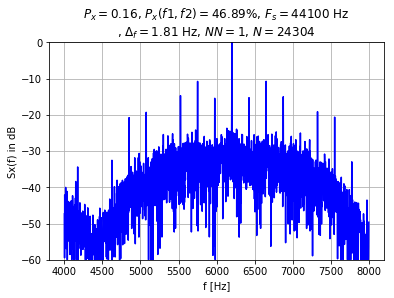

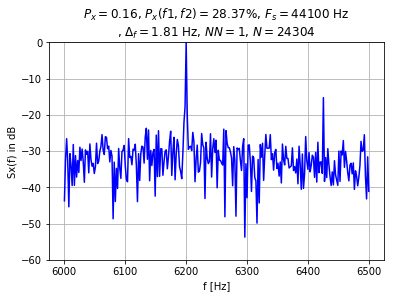

In [5]:
import wavfun
import showfun1
import comsig
import keyfun

Fs, rt = wavfun.wavread('asksig802.wav')

sig_rt = comsig.sigWave(rt, Fs)
plot(sig_rt.timeAxis(),rt)
xlim([0,0.01])
showfun1.showpsd(sig_rt, Fs, [-18000,18000,-60],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [0,15000,-60],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [4000,8000,-60],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [6000,6500,-60],sig_rt.__len__())
#showfun1.showpsd(sig_rt, Fs, [4000,6000,-30],sig_rt.__len__())

### It looks like the fc of the signal is 6200 and the ASK seems to be coherent

-13
24304


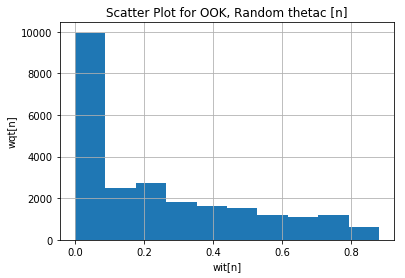

[118, 118, 21, 118, 119, 103, 113, 102, 118, 80, 22, 54, 102, 55, 103, 96, 117, 53, 68, 119, 119, 19, 87, 118, 48, 55, 119, 6, 82, 115, 65, 102, 119, 117, 119, 70, 87, 23, 103, 96, 115, 116, 85, 71, 86, 115, 87, 116, 48, 118, 21, 6, 50, 7, 117, 118, 119, 50, 68, 119, 119, 19, 87, 118, 48, 85, 6, 118, 118, 3, 112, 112, 119, 80, 119, 103, 103, 51, 87, 118, 48, 81, 118, 70, 87, 87, 85, 98, 115, 118, 118, 103, 6, 117, 119, 116, 116, 16, 119, 103, 119, 19, 64, 118, 113, 119, 118, 103, 118, 115]
vvvwgqfvP6f7g`u5DwwWv07wRsAfwuwFWg`stUGVsWt0v2uvw2DwwWv0UvvppwPwgg3Wv0QvFWWUbsvvguwttwgw@vqwvgvs


In [2]:
import wavfun
import showfun1
import comsig
import keyfun
import numpy as np
import pamfun
import ascfun
from pylab import *

Fs, rt = wavfun.wavread('asksig802.wav')

xtype = 'coh'
ptype = 'rect'
pparms = []
fcparms =[6000,0]
sig_rt = comsig.sigWave(rt, Fs)
tt = sig_rt.timeAxis()
FBparms = [1600,0]

bn, bt, wt, ixn = keyfun.askrcvr(tt,sig_rt,Fs,xtype,fcparms,FBparms, ptype, pparms)
#print(bn)
#plt.plot(wt[ixn].real, wt.imag[ixn], 'g*')
plt.hist(abs(bt))
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
#plt.xlim([-1.5,1.5])
#plt.ylim([-1.2,1.2])
plt.grid()
plt.show()
textString, ASCIIString = ascfun.bin2asc(bn,8)
print(ASCIIString)
print(textString)

## For asksig803


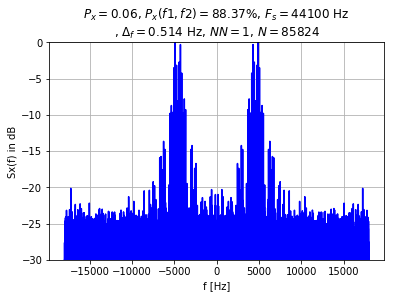

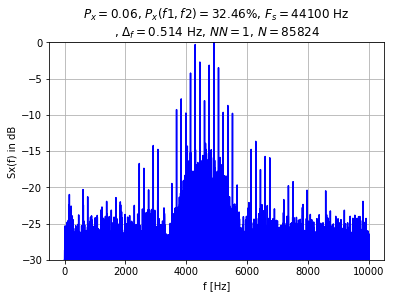

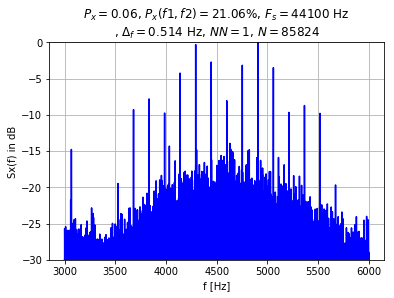

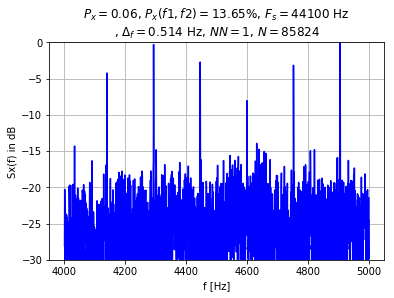

In [2]:
import wavfun
import showfun1
import comsig
import keyfun

Fs, rt = wavfun.wavread('asksig803.wav')
Fb = 100

sig_rt = comsig.sigWave(rt, Fs)
showfun1.showpsd(sig_rt, Fs, [-18000,18000,-30],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [0,10000,-30],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [3000,6000,-30],sig_rt.__len__())
showfun1.showpsd(sig_rt, Fs, [4000,5000,-30],sig_rt.__len__())
#showfun1.showpsd(sig_rt, Fs, [4000,6000,-30],sig_rt.__len__())

## Expt 1(e)

### In GNU Radio, I built the hierarchical blocks ASKxmtr_bc and ASKrcvr_cb (and the hierarchical subblocks within these blocks) that are given in the lab description. 
### Testing  the blocks using a flowgraph similar to ASK_test002 which is shown in the lab description.


#### Plots of running the flowgraph, one with a unipolar ’rect’ signal, 

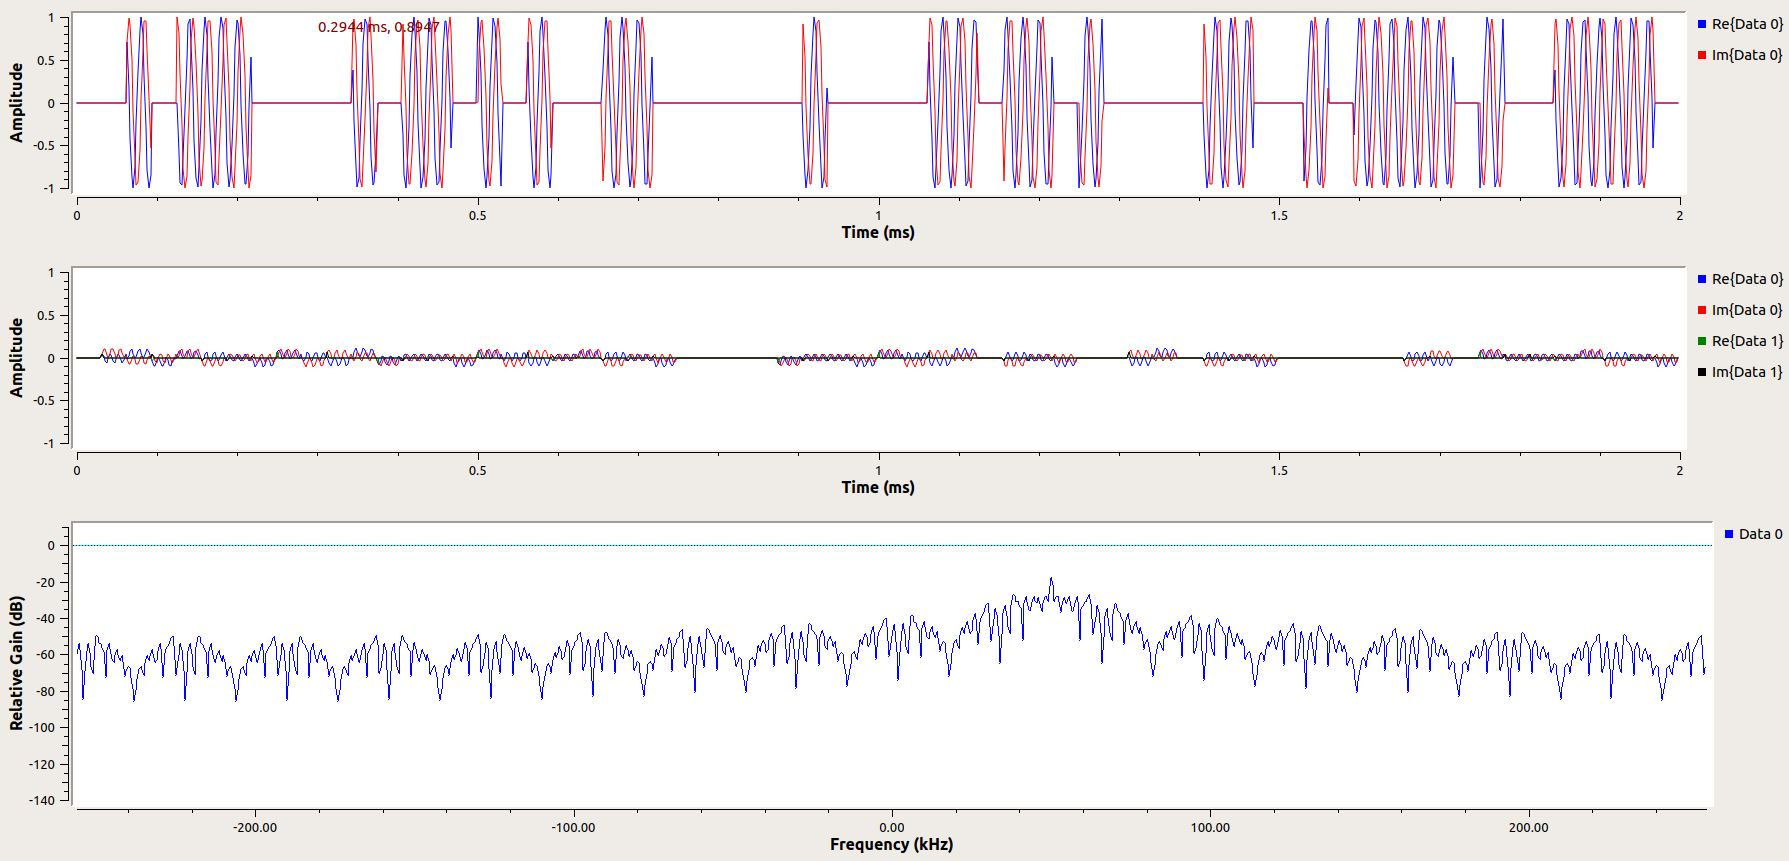

In [3]:
from IPython.display import Image
Image(filename='Expt1(e).JPG')


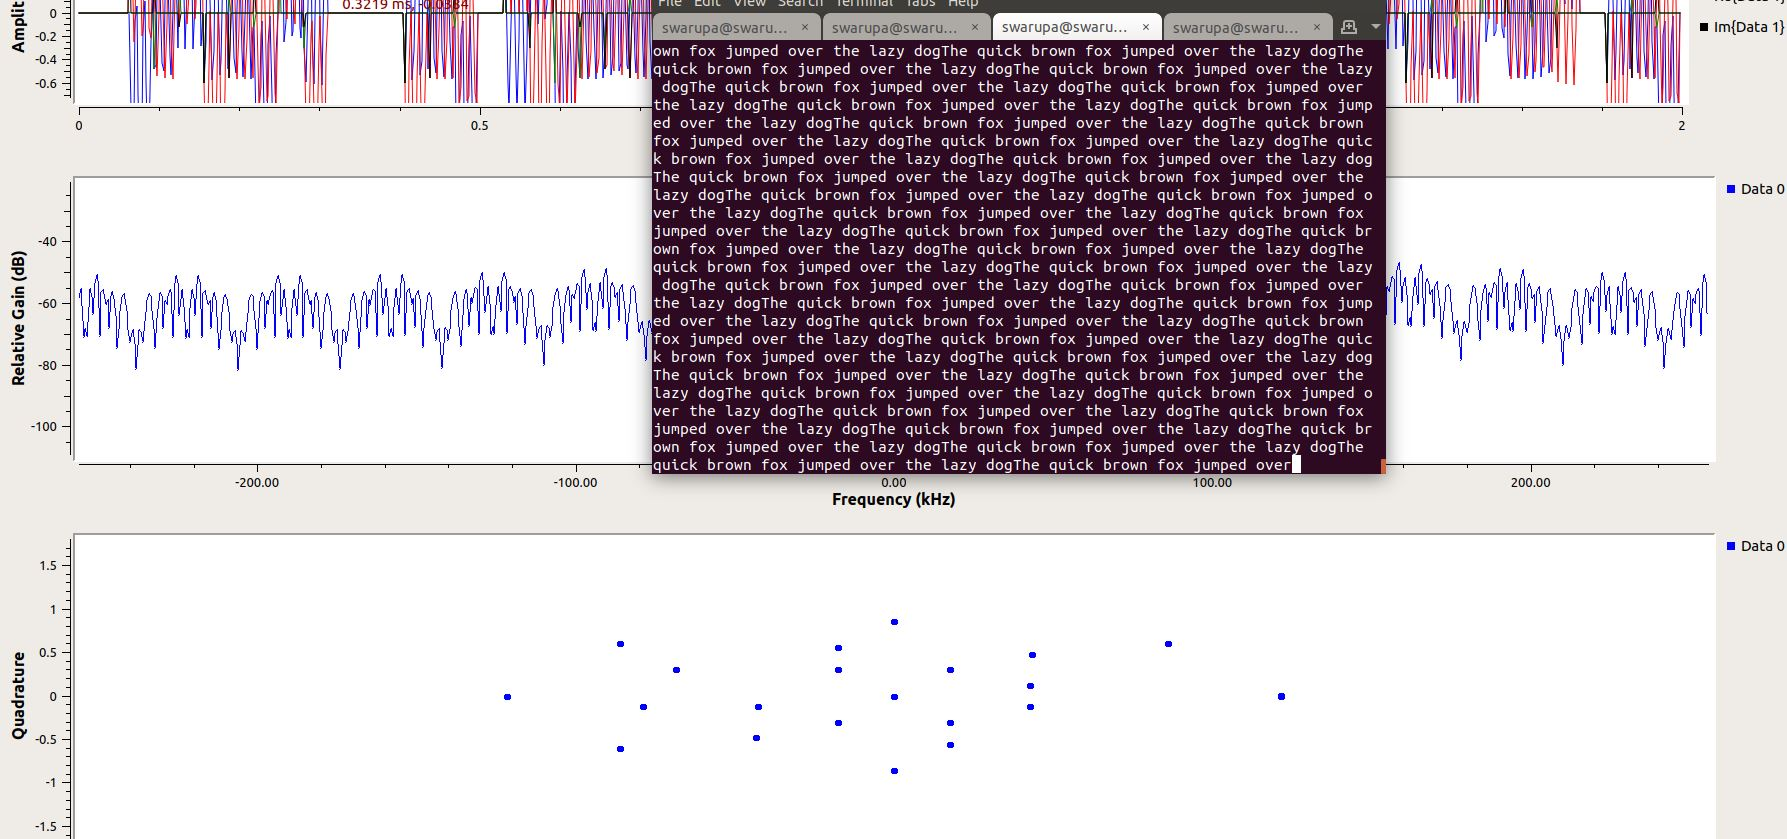

In [4]:
from IPython.display import Image
Image(filename='Expt1(e)1.JPG')


### From the plots of the unipolar rectangular we can tell that the Receiver and transmitter hierarchichal blocks are functioning correctly. I was able to get back the correct text by increasing the gain to upto 2.5.

#### Plots with a polar ’rrcf’ signal

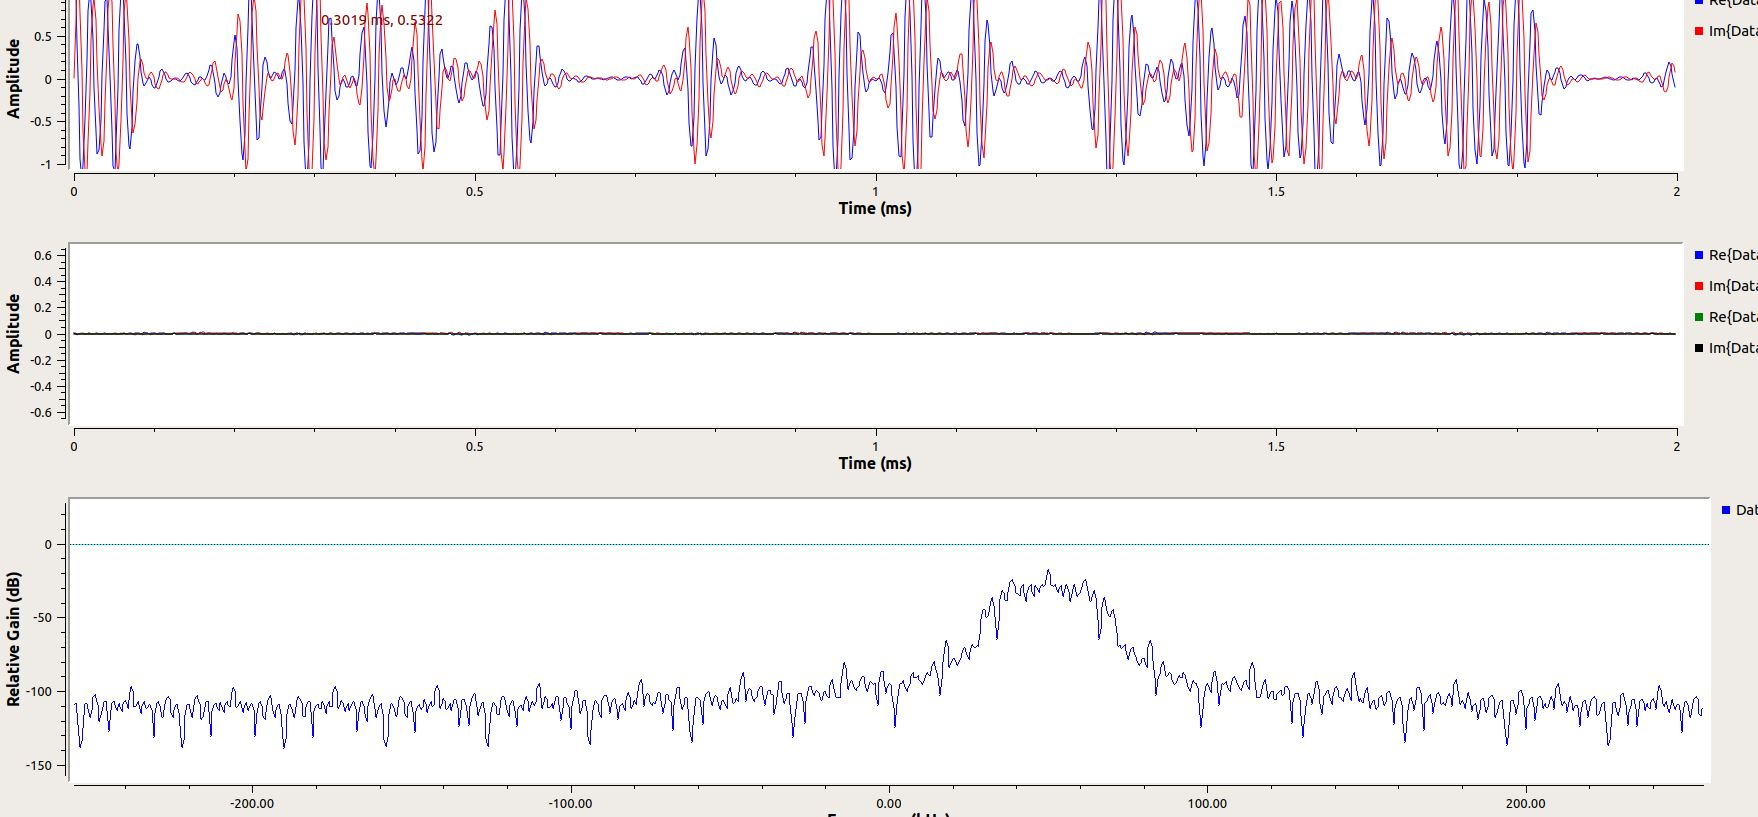

In [5]:
from IPython.display import Image
Image(filename='Expt1(e)2.JPG')


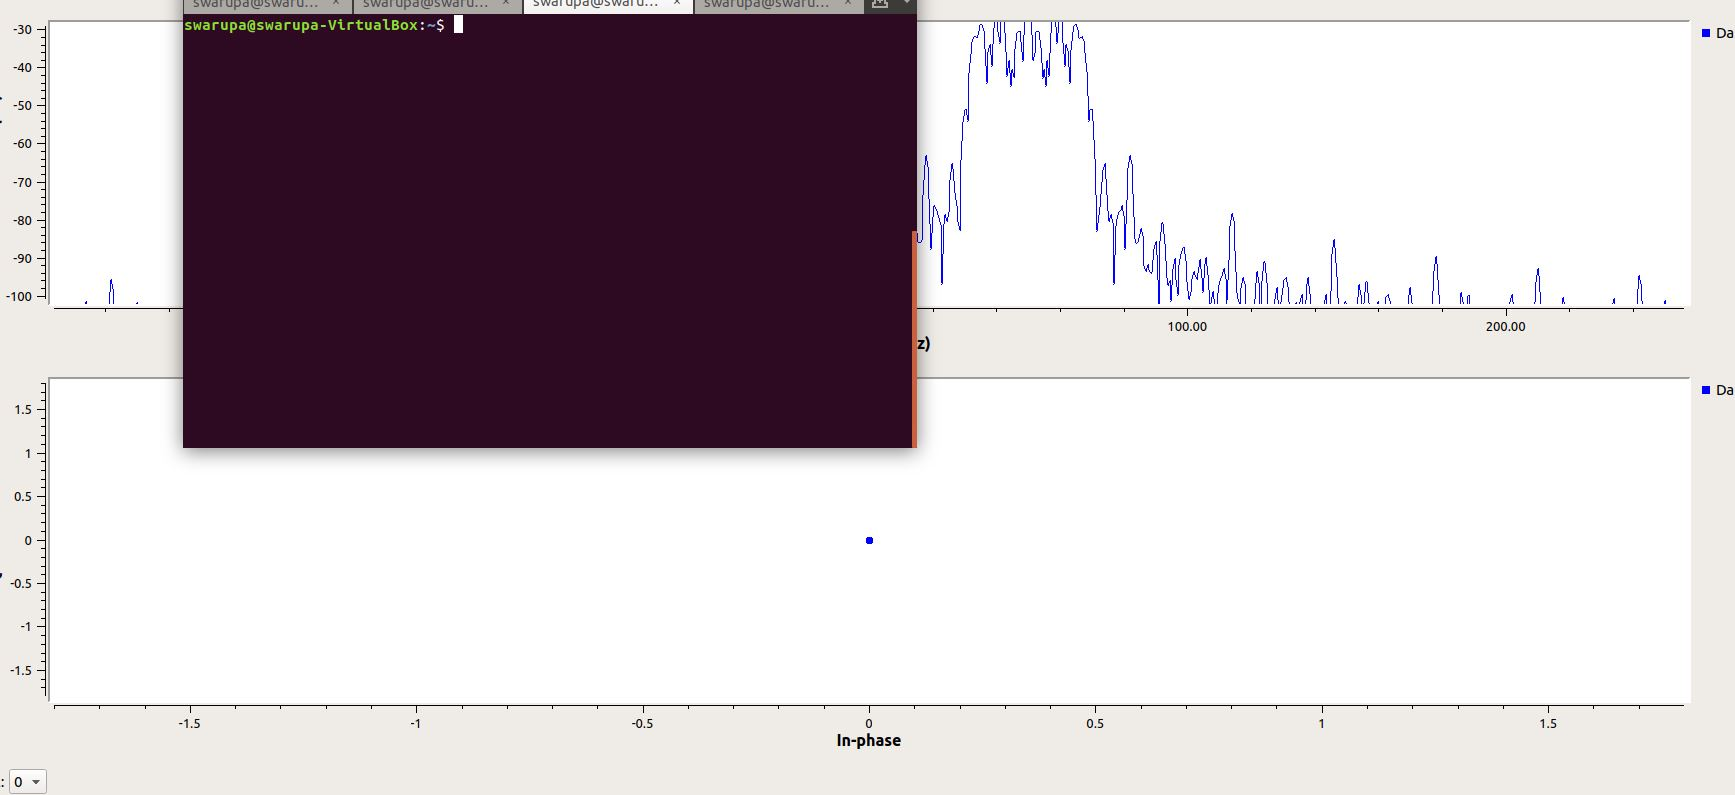

In [1]:
from IPython.display import Image
Image(filename='Expt1(e)3.JPG')


### The above plots are for a polar RRCF signal. From the above plots it is clear that the transmitter is working correctly for the signal and the plots i obtain are correct. However the receiver doesnt seem to be operating correctly, Since the time plot for the received signal seems to be almost zero. There is also no output at the terminal and hence the file sink. I think this might be because I cant get the sample delay and the symbol delay correct. Although I increased the gain to nearly 4 I was still unable to get any output

## Expt 2(a)

### Testing my fskxmtr function by recreating the three (time domain) sample graphs for FB = 100 baud, fc0 = 300 Hz and fc1 = 400 Hz, which were given in the introduction for binary coherent FSK, noncoherent FSK, and CPFSK. Use dn = {0, 1, 1, 1, 0, 0, 1, 0} and (for the second graph) θc[n] = {270◦, 225◦, 4◦, 135◦, 250◦, 90◦, 40◦, 240◦}.

### Generating coherent FSK signals

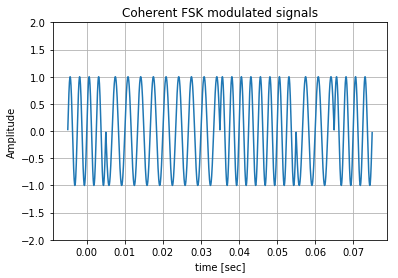

In [20]:
from pylab import *
from keyfun import *
M = 2
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'coh'
fcparms = [300,400]
tt,st = fskxmtr(M, dnhct, FB, Fs, ptype, pparms, xtype, fcparms)
plot(tt,st)
xlabel("time [sec]")
ylabel("Amplitude")
title("Coherent FSK modulated signals")
grid()
ylim([-2,2])
show()

### Generating non coherent FSK signals

[4.71238898038469, 3.9269908169872414, 0.06981317007977318, 2.356194490192345, 4.363323129985823, 1.5707963267948966, 0.6981317007977318, 4.1887902047863905]


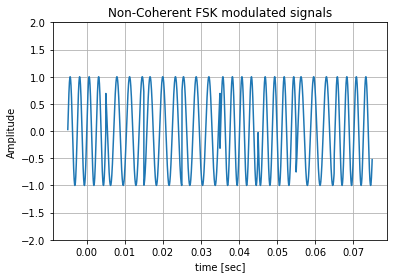

In [8]:
from pylab import *
from keyfun import *

M = 2
thetacn = 0
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'noncoh'
fcparms = [[300,400], [270, 225, 4, 135, 250, 90, 40, 240]]
tt,st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)

plot(tt,st)
xlabel("time [sec]")
ylabel("Amplitude")
title("Non-Coherent FSK modulated signals")
grid()
ylim([-2,2])
show()

### Generating CPFSK signal

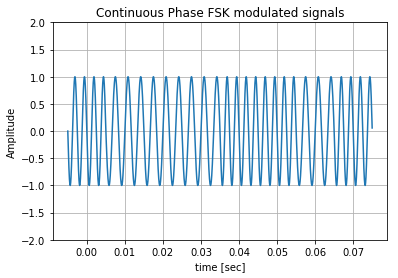

In [9]:
from pylab import *
from keyfun import *

M = 2
thetacn = 0
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
#di = 2*di-1
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'cpfsk'
fcparms = [300,400,90]
tt, st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)

plot(tt,st)
xlabel("time [sec]")
ylabel("Amplitude")
title("Continuous Phase FSK modulated signals")
grid()
ylim([-2,2])
show()

#### By looking at the time plots of the FSK modulated signals we conclude that the FSK transmitter is working correctly. 

## Expt 2(b)

### In the keyfun module I implement the fskrcvr function. Depending on the choice of the rtype, the receiver performs demodulation using either M coherent MFs, M MFEDs, or using a phase detector followed by differentiation and a MF. 


### We try to demodulate a coherent FSK signal

In [1]:
from pylab import *
from keyfun import *

M = 2
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'coh'
fcparms = [300,400]
FBparms = [FB,0]

tt,st = fskxmtr(M, dnhct, FB, Fs, ptype, pparms, xtype, fcparms)
bn,bt,ixn = fskrcvr(tt, st, FBparms, fcparms,xtype, ptype, pparms)

print(bn)

[0, 1, 1, 1, 0, 0, 1, 0]


### Next we try and demodulate a noncoherent FSK


In [2]:
from pylab import *
from keyfun import *

M = 2
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'noncoh'
fcparms = [[300,400], [270, 225, 4, 135, 250, 90, 40, 240]]
FBparms = [FB,0]

tt,st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)
bn,bt,ixn = fskrcvr(tt, st, FBparms, fcparms,xtype, ptype, pparms)

print(bn)

[0, 1, 1, 1, 0, 0, 1, 0]


### Lastly we try and demodulate the Continous phase FSK

In [3]:
from pylab import *
from keyfun import *

M = 2
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
#di = 2*di-1
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'cpfsk'
fcparms = [300,400,90]
FBparms = [FB,0]

tt, st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)
bn,bt,ixn = fskrcvr(tt, st, FBparms, fcparms,xtype, ptype, pparms)

print(bn)

[0, 1, 1, 1, 0, 0, 1, 0]


### We observe that FSK receiver works and is able to decode coherent FSK, non-coherent FSK and Continous Phase FSK

## Expt 2(c)

### We Generates a coherent binary FSK signal from random data with equally likely 0’s and 1’s, using a rectangular p(t), FB = 100 baud, fc0 = 300 Hz, θc0 = 0◦ fc1 = 400 Hz, and θc1 = 0◦

### Used a coherent demodulator to produce a scatter plot of w0[n] versus w1[n]. 


[0, 1, 1, 1, 0, 0, 1, 0]


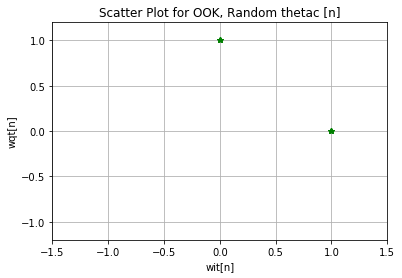

In [2]:
from pylab import *
from keyfun import *

M = 2
thetacn = 90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'coh'
fcparms = [300,400]
FBparms = [FB,0]
fcparmsr = [[300,400],thetacn]

tt,st = fskxmtr(M, dnhct, FB, Fs, ptype, pparms, xtype, fcparms)
bn, wt, ixn = fskrcvr(tt, st, FBparms, fcparmsr,xtype, ptype, pparms)

plt.plot(bn, wt, 'g*')
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
plt.xlim([-1.5,1.5])
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()

### Changed the phase θc1 from 0◦to 180◦ and check whether the signals transmitted at fc0 and at fc1 remain orthogonal in the signal space spanned by w0[n] and w1[n].
.

9.688423658127641e-05
1.6716283182564715e-18


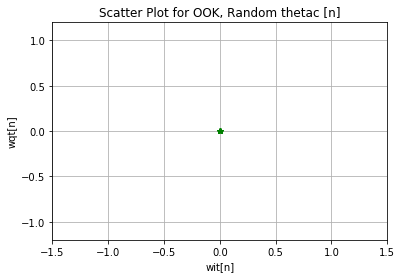

In [14]:
from pylab import *
from keyfun import *

M = 2
thetacn = 0
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'coh'
fcparms = [300,400]
FBparms = [FB,0]
fcparmsr = [[300,400],thetacn]

tt,st = fskxmtr(M, dnhct, FB, Fs, ptype, pparms, xtype, fcparms)
bn, wt, ixn = fskrcvr(tt, st, FBparms, fcparmsr,xtype, ptype, pparms)

plt.plot(bn, wt, 'g*')
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
plt.xlim([-1.5,1.5])
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()

### The signals no longer remain orthogonal for thetac = 0/180. However orthogonality is maintained for other values of thetac

### Is it possible to reduce the frequency spacing ∆f = fc1 − fc0 to a value less than FB while maintaining orthogonality? Try changing fc1 to 350 Hz and vary the phase θc1 again from 0◦to 180◦

0.5
0.33721056739092903


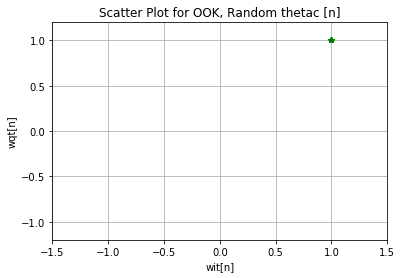

In [17]:
from pylab import *
from keyfun import *

M = 2
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'coh'
fcparms = [350,400]
FBparms = [FB,0]
fcparmsr = [[350,400],thetacn]

tt,st = fskxmtr(M, dnhct, FB, Fs, ptype, pparms, xtype, fcparms)
bn, wt, ixn = fskrcvr(tt, st, FBparms, fcparmsr,xtype, ptype, pparms)

plt.plot(bn, wt, 'g*')
plt.title("Scatter Plot for OOK, Random thetac [n]")
plt.xlabel('wit[n]')
plt.ylabel('wqt[n]')
plt.xlim([-1.5,1.5])
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()

### The signals no longer remain orthogonal 

### If the difference between the two frequencies used for FSK is too small, the probability of error increases. Thus we can no longer demodulate the signal correctly. Usually we try to choose the angles such that the condition of orthogonality is maintained between all M symbols. We notice that however when the difference becomes less than Fb then the normalized distance between the symbols using the different frequency becomes too small and the information cannot be recovered accurately

## Expt 2(d)

### Plotting the PSD of a uniformly distributed data with M = 2 and is coherent FSK with rectangular pt

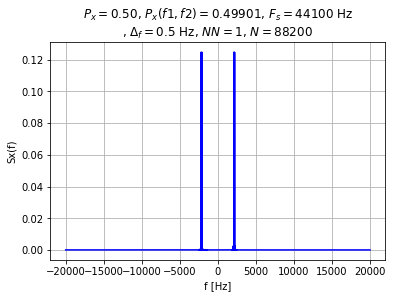

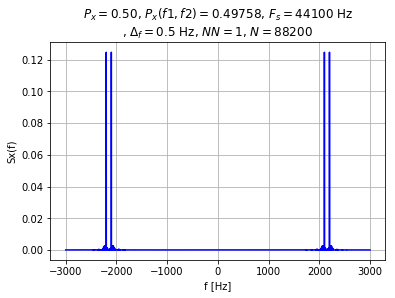

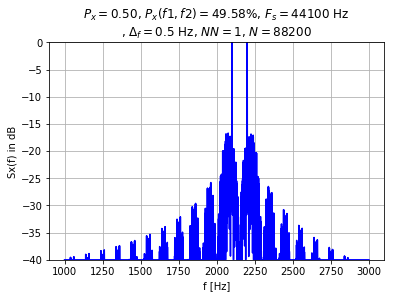

In [23]:
import numpy as np
from pylab import *
import keyfun
import comsig
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
M = 2
thetacn = -90
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
di = floor(2*(rand(nbits)))
dnhct = [di,thetacn]
fcparms = [2100,2200]

tt,st = keyfun.fskxmtr(M, dnhct, Fb, Fs, ptype, pparms, xtype, fcparms)
sig_st = comsig.sigWave(st,Fs)
showfun1.showpsd(sig_st,Fs,[-20000,20000,0],sig_st.Nsamp)
showfun1.showpsd(sig_st,Fs,[-3000,3000,0],sig_st.Nsamp)          
showfun1.showpsd(sig_st,Fs,[1000,3000,-40],sig_st.Nsamp)



#### The -40db bandwidth for a coherent FSK with M=2, is 2000Hz

### Plotting the PSD of a uniformly distributed data with M = 4 and is coherent FSK

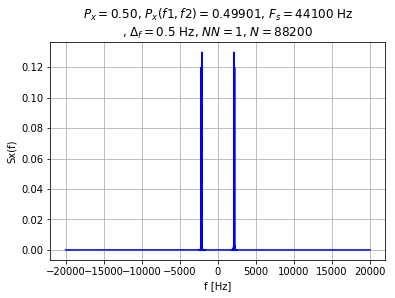

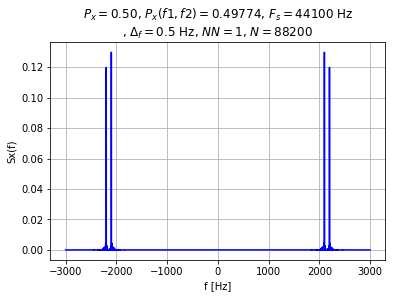

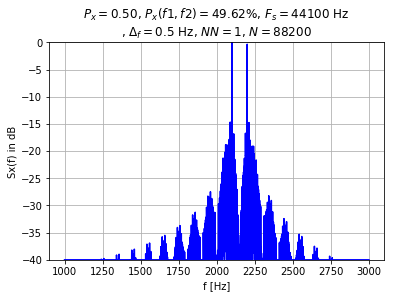

In [18]:
import numpy as np
from pylab import *
import keyfun
import comsig
import showfun1

Fb=100
Fs=44100
ptype='rect'
pparms=[]
xtype='coh'
M = 4
thetacn = -90
tlen = 2
nsamples = tlen*Fs
nbits = tlen*Fb
di = floor(2*(rand(nbits)))
dnhct = [di,thetacn]
fcparms = [2100,2200]

tt,st = keyfun.fskxmtr(M, dnhct, Fb, Fs, ptype, pparms, xtype, fcparms)
sig_st = comsig.sigWave(st,Fs)
showfun1.showpsd(sig_st,Fs,[-20000,20000,0],sig_st.Nsamp)
showfun1.showpsd(sig_st,Fs,[-3000,3000,0],sig_st.Nsamp)
showfun1.showpsd(sig_st,Fs,[1000,3000,-40],sig_st.Nsamp)



### The -40db bandwidth for the coherent FSK with M=4 is 1500. 

#### We observe that the -40db bandwidth decreases by using M = 4. Thus we can transmit more information at the same power by using quarternary frequency shift keying.

### Plotting the PSD of a uniformly distributed data with M = 2 and is non-coherent FSK 

[4.71238898038469, 3.9269908169872414, 0.06981317007977318, 2.356194490192345, 4.363323129985823, 1.5707963267948966, 0.6981317007977318, 4.1887902047863905]


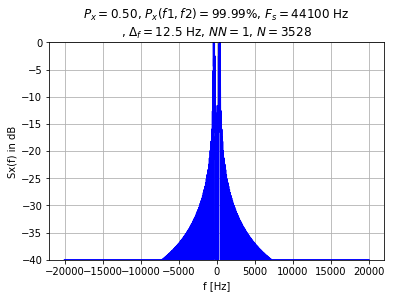

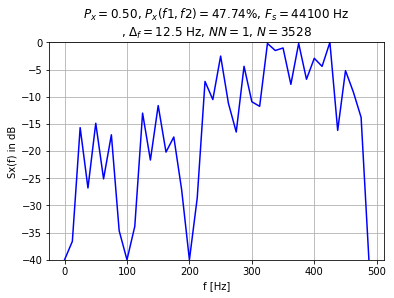

In [15]:
from pylab import *
from keyfun import *
from showfun1 import *

M = 2
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'noncoh'
fcparms = [[300,400], [270, 225, 4, 135, 250, 90, 40, 240]]
FBparms = [FB,0]

tt,st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)
sig_st = comsig.sigWave(st,Fs)
showpsd(sig_st,Fs,[-20000,20000,-40],sig_st.Nsamp)
showpsd(sig_st,Fs,[0,500,-40],sig_st.Nsamp)            


### Plotting the PSD of a uniformly distributed data with M = 4 and is non-coherent FSK 

[4.71238898038469, 3.9269908169872414, 0.06981317007977318, 2.356194490192345, 4.363323129985823, 1.5707963267948966, 0.6981317007977318, 4.1887902047863905]


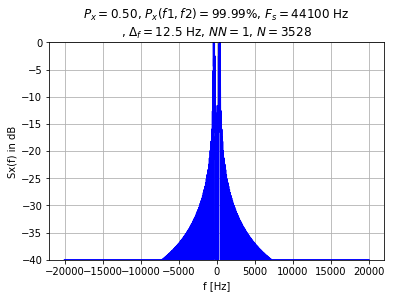

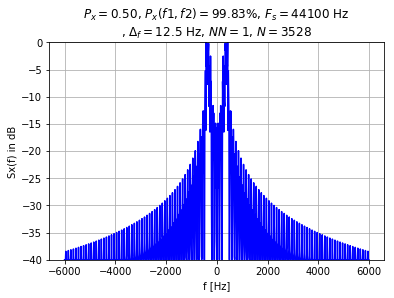

In [7]:
from pylab import *
from keyfun import *
from showfun1 import *

M = 4
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'noncoh'
fcparms = [[300,400], [270, 225, 4, 135, 250, 90, 40, 240]]
FBparms = [FB,0]

tt,st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)
sig_st = comsig.sigWave(st,Fs)
showpsd(sig_st,Fs,[-20000,20000,-40],sig_st.Nsamp)
showpsd(sig_st,Fs,[-6000,6000,-40],sig_st.Nsamp)            


### The bandwidth of noncoherent FSK for both M =2,4 is 7000Hz.

### Plotting the PSD of a uniformly distributed data with M = 2 and is Continous Phase FSK

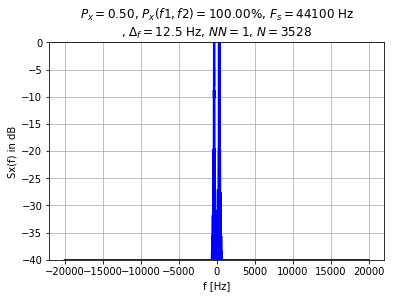

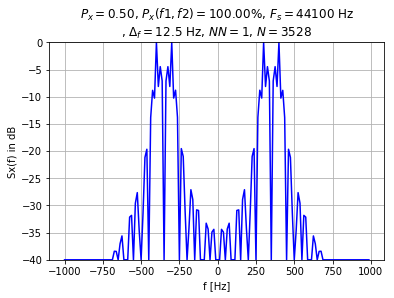

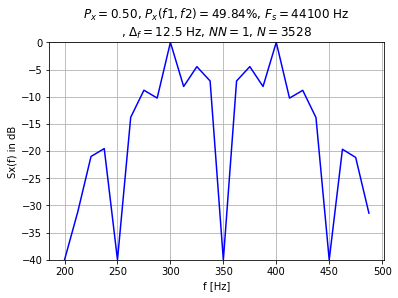

In [11]:
from pylab import *
from keyfun import *

M = 2
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
#di = 2*di-1
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'cpfsk'
fcparms = [300,400,90]
FBparms = [FB,0]

tt, st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)
sig_st = comsig.sigWave(st,Fs)
showpsd(sig_st,Fs,[-20000,20000,-40],sig_st.Nsamp)
showpsd(sig_st,Fs,[-1000,1000,-40],sig_st.Nsamp)
showpsd(sig_st,Fs,[200,500,-40],sig_st.Nsamp)



### Plotting the PSD of a uniformly distributed data with M = 4 and is Continous Phase FSK

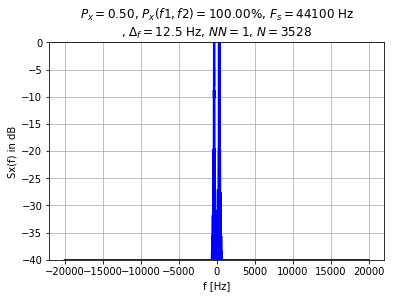

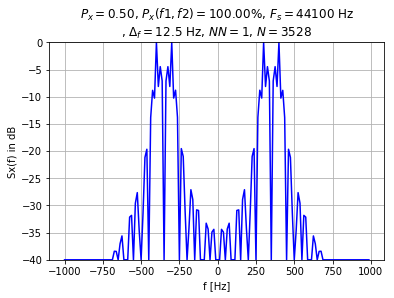

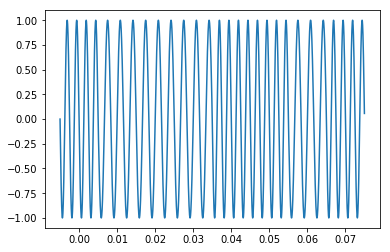

In [10]:
from pylab import *
from keyfun import *

M = 4
thetacn = -90
di = array([0,1,1,1,0,0,1,0])
dnhct = [di,thetacn]
#di = 2*di-1
FB = 100
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'cpfsk'
fcparms = [300,400,90]
FBparms = [FB,0]

tt, st = fskxmtr(M, di, FB, Fs, ptype, pparms, xtype, fcparms)
sig_st = comsig.sigWave(st,Fs)
showpsd(sig_st,Fs,[-20000,20000,-40],sig_st.Nsamp)
showpsd(sig_st,Fs,[-1000,1000,-40],sig_st.Nsamp)
plot(tt,st)

### From the PSD of the CPFSK signals for both M =2,4 is 750 Hz

## Expt 2(e)

### For fsksig801

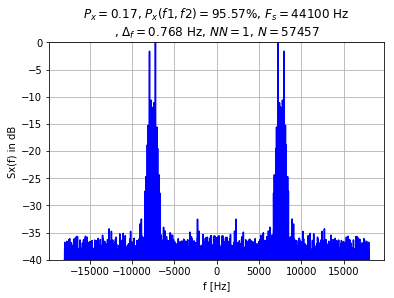

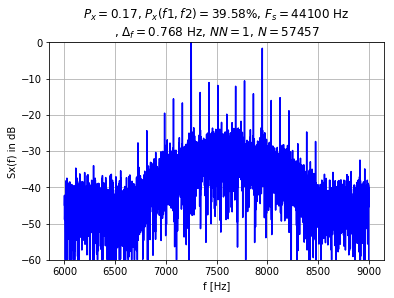

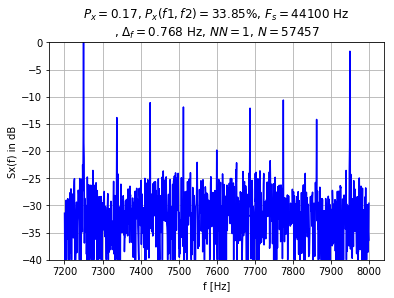

(0, 0.005)

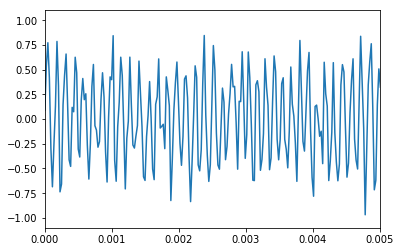

In [25]:
from wavfun import *
from comsig import *
from showfun1 import *
from keyfun import *

Fs, rt = wavread('fsksig801.wav')
sig_rt = sigWave(rt, Fs)
showpsd(sig_rt, Fs, [-18000,18000,-40],sig_rt.__len__())
showpsd(sig_rt, Fs, [6000,9000,-60],sig_rt.__len__())
showpsd(sig_rt, Fs, [7200,8000,-40],sig_rt.__len__())
plot(sig_rt.timeAxis(),sig_rt.signal())
xlim([0, 0.005])

### From the PSD the signal looks like a Binary Coherent FSK. The frequencies seem to be 7250 and 7950. The Fb seems to be around 1500-2000 Hz from looking at the width of the Rect pulse

In [1]:
from wavfun import *
from comsig import *
from showfun1 import *
from keyfun import *
from ascfun import *
import matplotlib.pyplot as plt

Fs, rt = wavread('fsksig801.wav')
M = 2
thetacn = 0

FB = 1500
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'coh'

FBparms = [FB,0]
fcparmsr = [7200,7900]
sig_rt= sigWave(rt,Fs)

bn, wt, ixn = fskrcvr(sig_rt.timeAxis(), rt, FBparms, fcparmsr,xtype, ptype, pparms)
plt.hist(abs(wt))

textString, ASCIIString = bin2asc(bn,8)
print(textString)

OÆ?gx0ÏàyÀ0l ÿ`xÀOÆ?¤aðÿðÀ<¹ÏÆ?`ððàò3OÎ0yð<àðp¡Æy8<àÿð@Æ?cþ(3`Â?àÿxþÀ?æ'?Î0x8Ï`~ÀÎ¦ Ï`øÂ<3u`0<àgÀ3SÆ<d`à3àðÃ<dðÃøÿò3<ààÏàòÏÆ0gàÀáò?æÆ?20xfð<àÌ


### For fsksig802

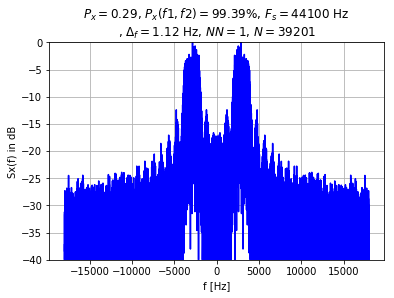

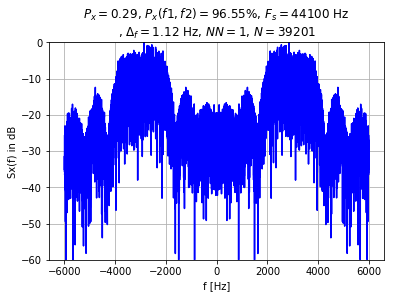

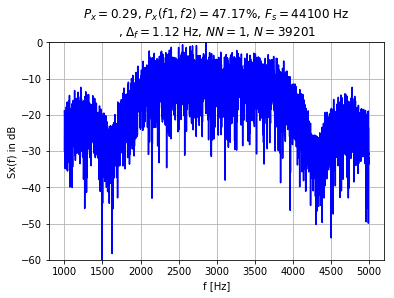

(0, 0.005)

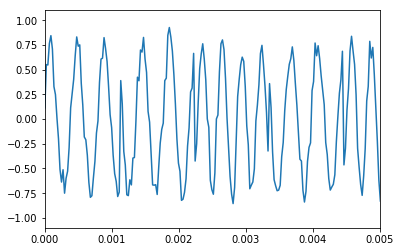

In [14]:
from wavfun import *
from comsig import *
from showfun1 import *
from keyfun import *

Fs, rt = wavread('fsksig802.wav')
sig_rt = sigWave(rt, Fs)
showpsd(sig_rt, Fs, [-18000,18000,-40],sig_rt.__len__())
showpsd(sig_rt, Fs, [-6000,6000,-60],sig_rt.__len__())
showpsd(sig_rt, Fs, [1000,5000,-60],sig_rt.__len__())
plot(sig_rt.timeAxis(),sig_rt.signal())
xlim([0, 0.005])

### From the PSD and the time plots it looks like it is a Binary non coherent FSK signal with FB = 2000, the fcs seem to be around 2200 and 2700

\¢$	=Ó1r$T]ñ'¸¿^1 H1©


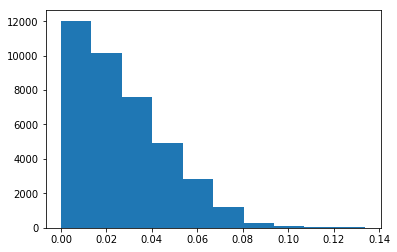

In [2]:
from wavfun import *
from comsig import *
from showfun1 import *
from keyfun import *
from ascfun import *

Fs, rt = wavread('fsksig802.wav')
sig_rt = sigWave(rt, Fs)
M = 2

FB = 3000
Fs = 44100
ptype = 'rect'
pparms = []
xtype = 'noncoh'
fcparms = [[2200,2700]]
FBparms = [FB,0]

bn,bt,ixn = fskrcvr(sig_rt.signal(), rt, FBparms, fcparms,xtype, ptype, pparms)
plt.hist(abs(bt))

textString, ASCIIString = bin2asc(bn,8)
print(textString)

### It looks like I am unable to decipher the message probably because i cant find the exact threshold for deciding between 0 and 1 for both

## Expt 2(g)

### In the GNU Radio Companion, I built the “loopback” BPSK communication system flowgraph shown in the lab description. By changing the sym dly to 7 i was able to recover the message and view it on the terminal

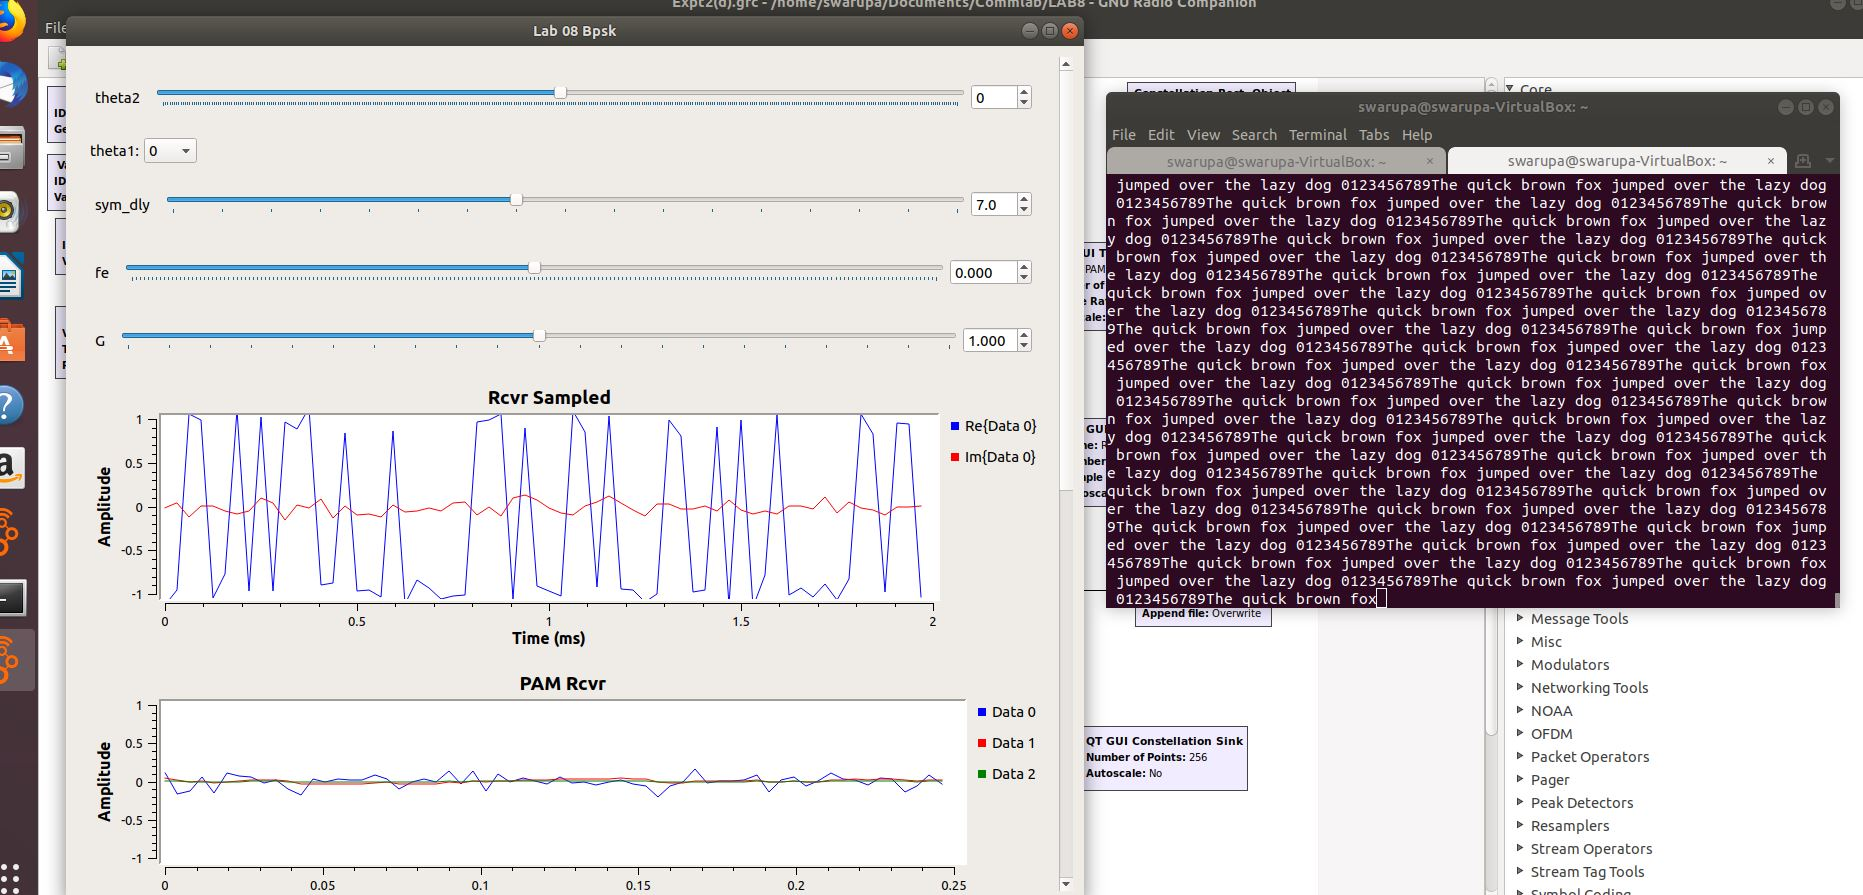

In [1]:
from IPython.display import Image
Image(filename='Expt2g1.JPG')


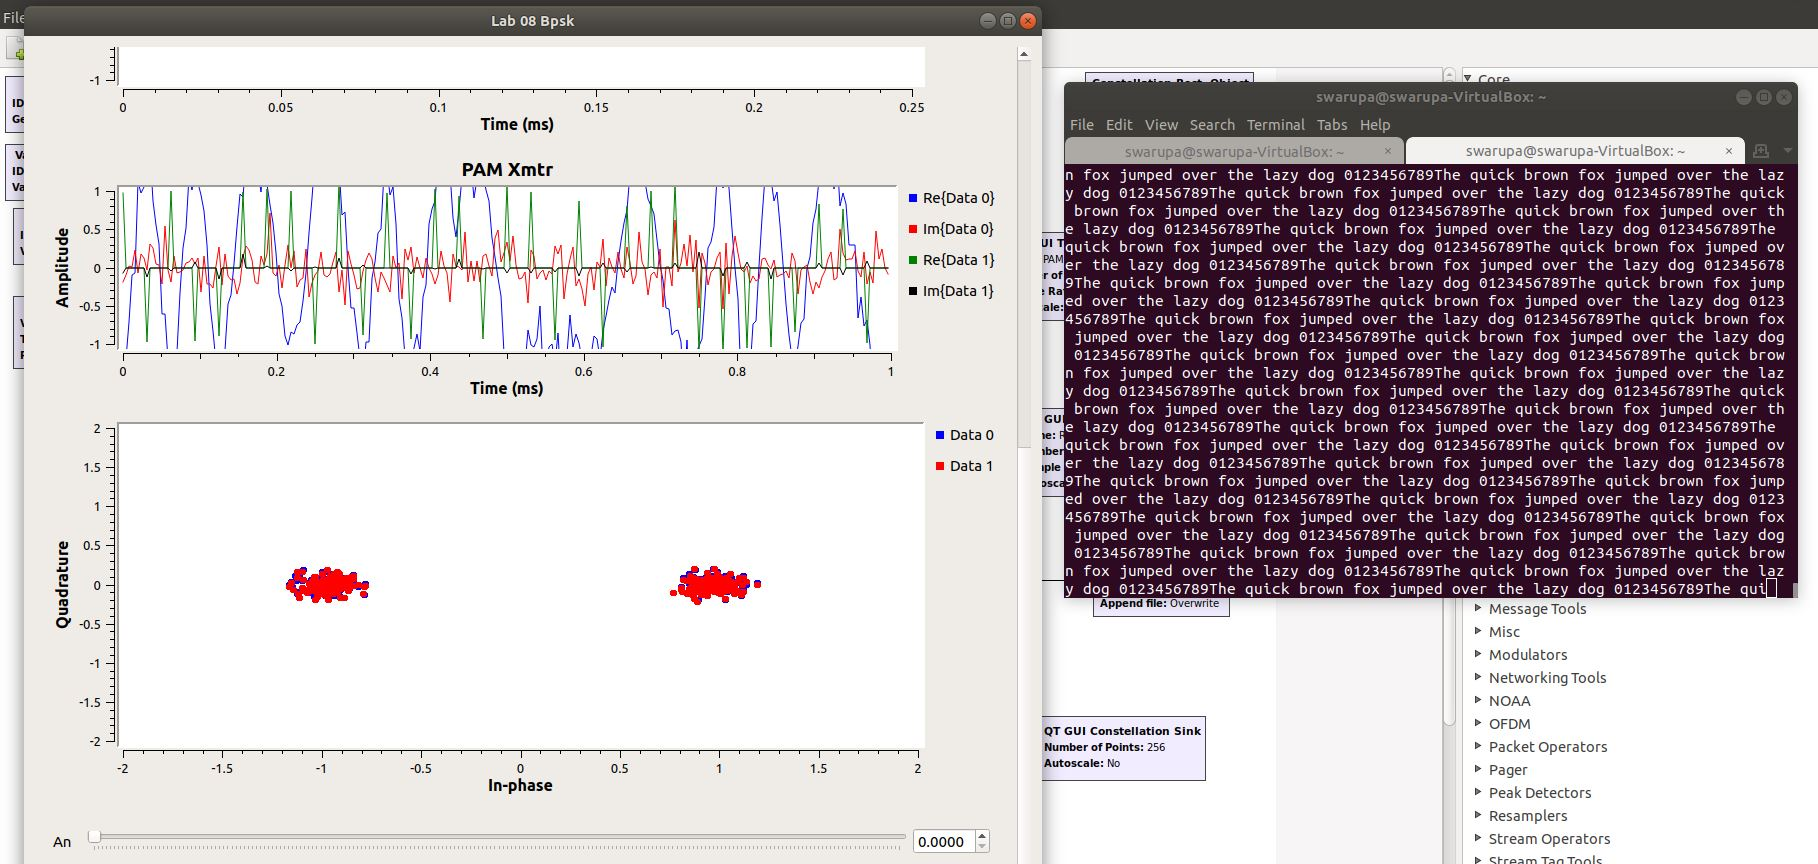

In [2]:
from IPython.display import Image
Image(filename='Expt2g2.JPG')


### Next I change the amplitude of the noise to see the effect on the ability to receive the transmitted message signal.

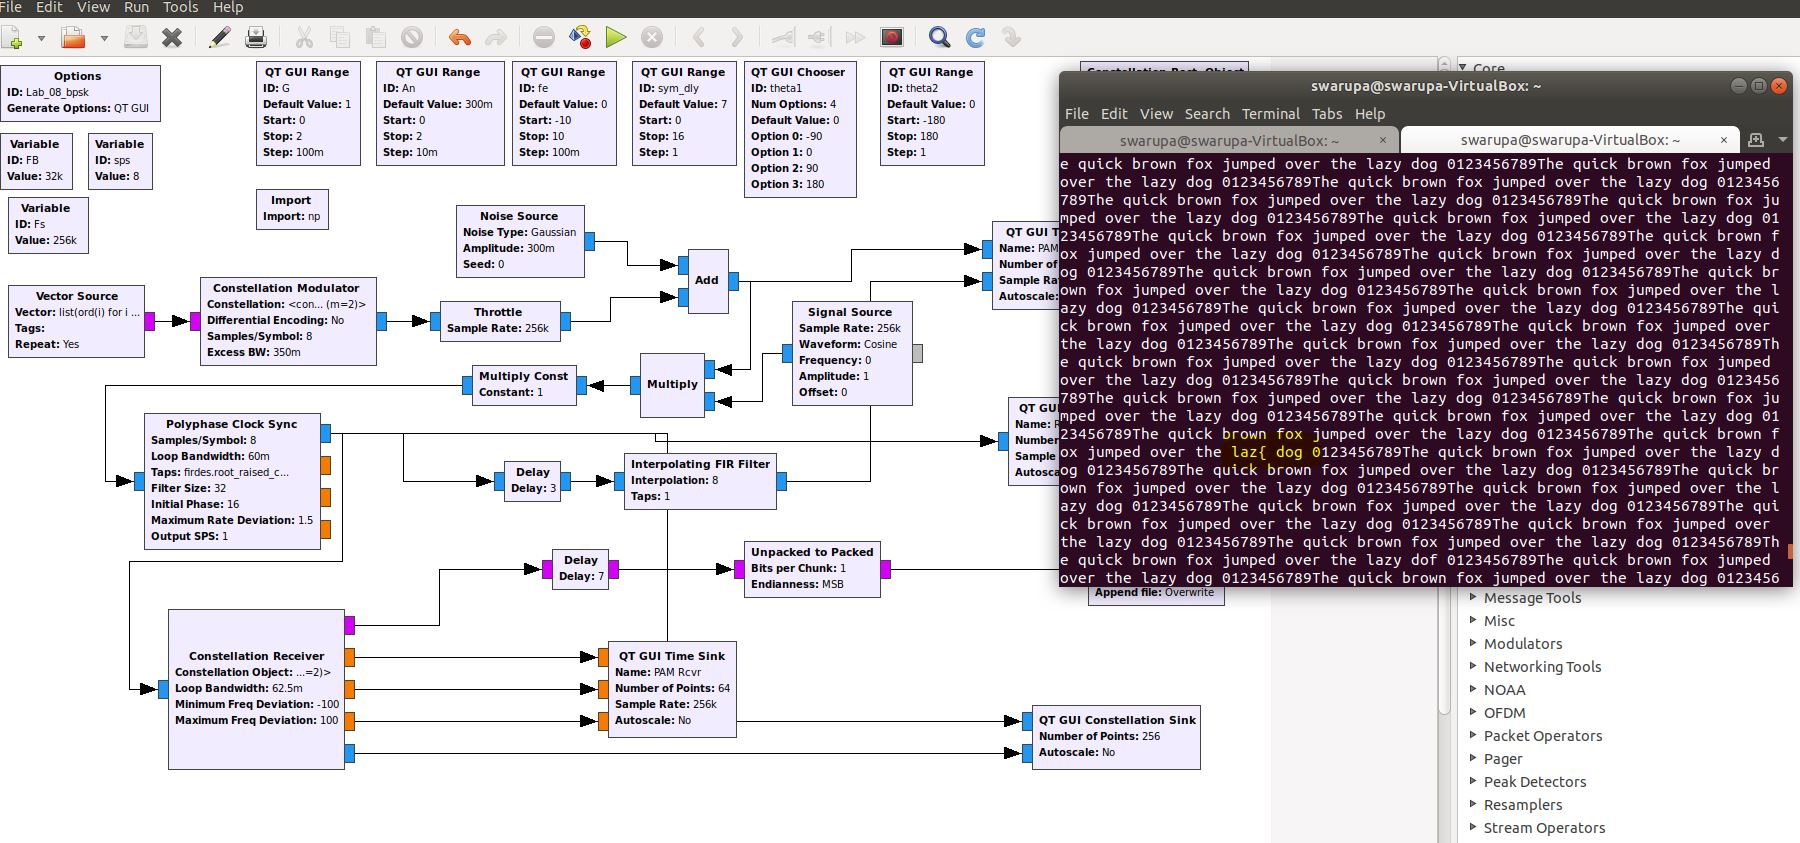

In [3]:
from IPython.display import Image
Image(filename='Expt2g3.JPG')

#### The first errors start to show for An = 1.1 and the message is no longer decipherable after 1.4. 

#### This is to be expected as the noise is now louder than the signal. However the system is comparitively resistant to noise. Since for any signal to noise ratio less than 1, the occurence of error is zero

### Next I change the Gain to 2 and increase the Signal to noise ratio. This time it causes the signal to disintegrate faster and for An = 0.8 the signal can no longer be deciphered

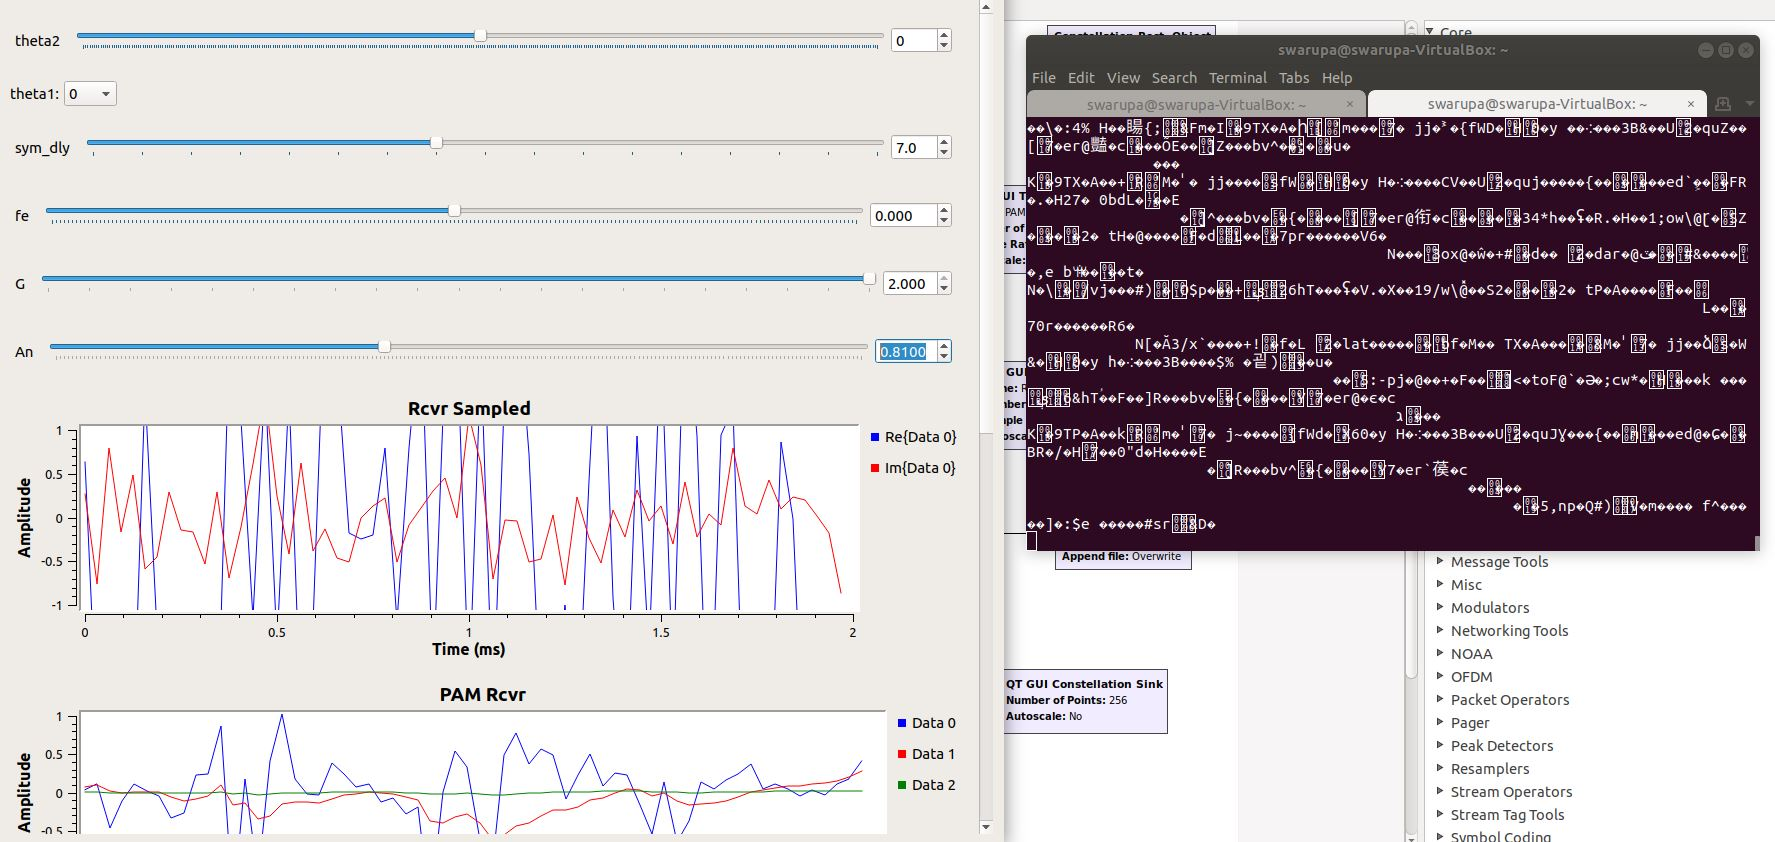

In [5]:
from IPython.display import Image
Image(filename='Expt2g4.JPG')

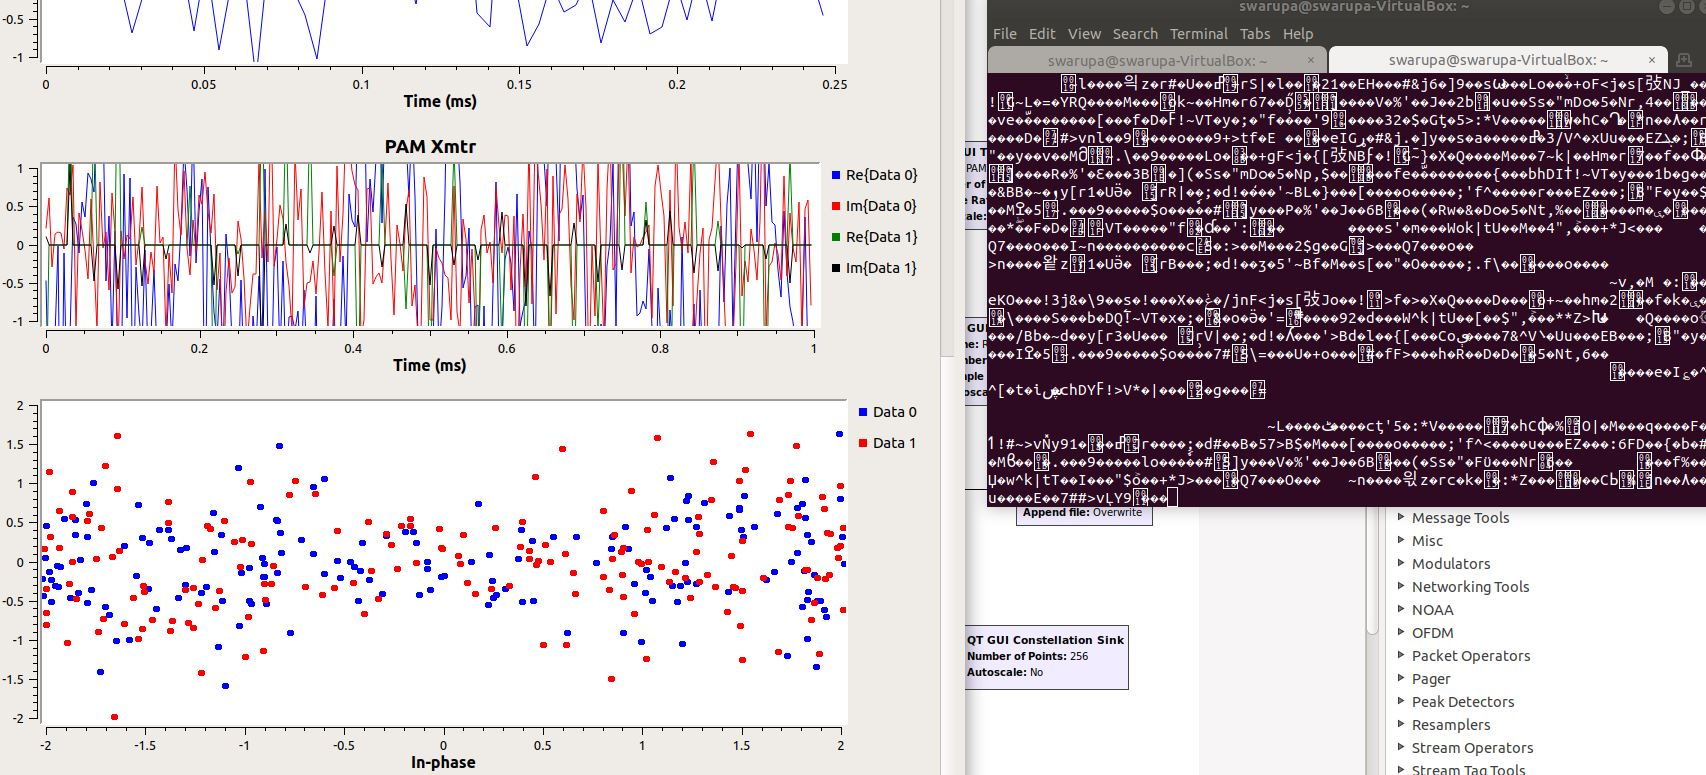

In [7]:
from IPython.display import Image
Image(filename='Expt2g5.JPG')

### It is clear from the scatter plot that the higher Gain is causing the transmitted signal to not coincide with the received signal at all. Thus the message can no longer be deciphered

## Expt 2(h)

### Attempted Free-space reception of transmitted BPSK signals. In the lab there is a wireless transmitter that transmits two BPSK signals, one at fc = 315.0 MHz with FB = 32000 baud and one in the vicinity of this fc with a different baud rate. Both signals use ‘rrcf’ PAM pulses with α = 0.35.

### We Used an rtl-sdr receiver together with the GNU Radio flowgraph given in the lab description to receive the ASCII text in the two messages. The first message is shown below. I was able to obtain it at samp delay = 1 with Gain = 9.8

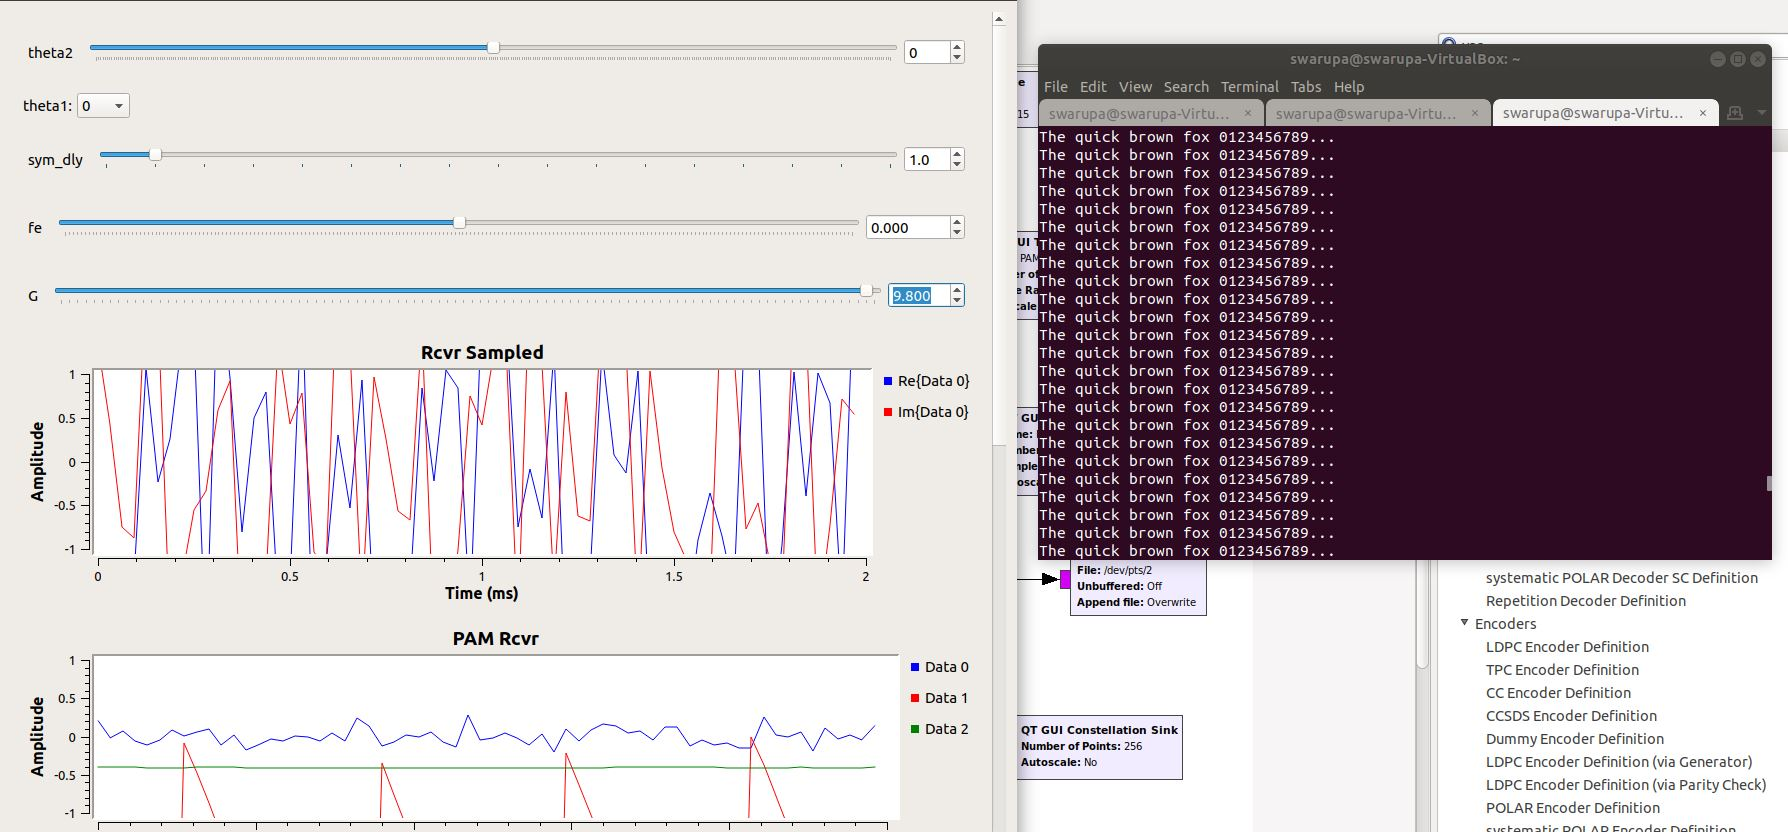

In [9]:
from IPython.display import Image
Image(filename='Expt2h1.JPG')

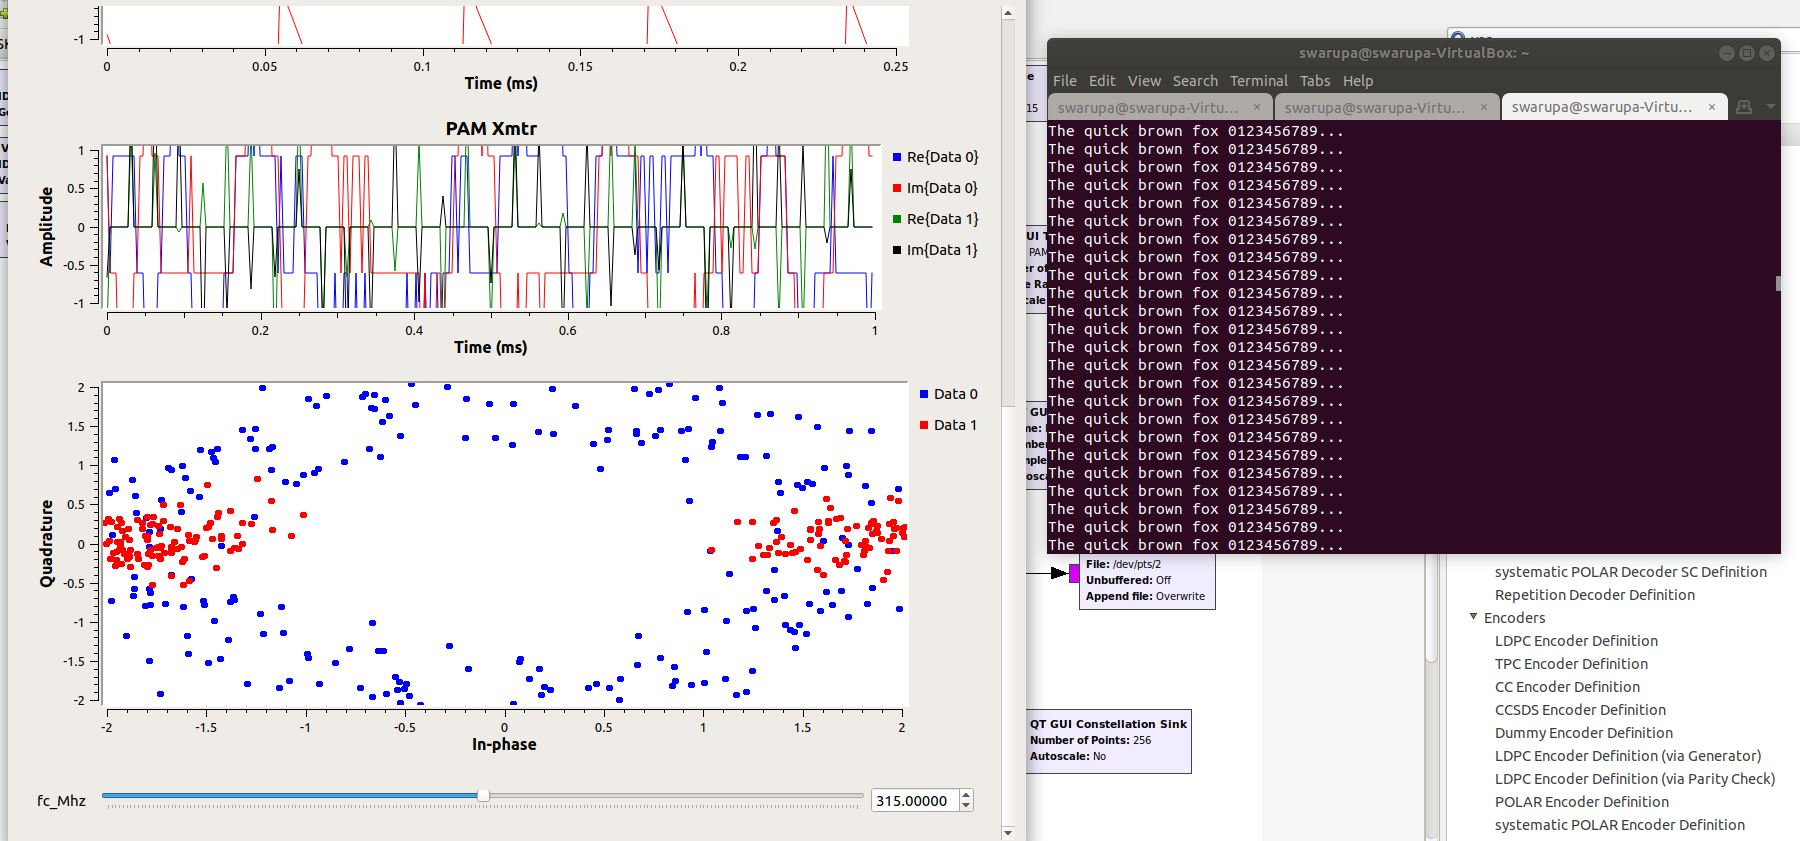

In [10]:
from IPython.display import Image
Image(filename='Expt2h2.JPG')